# Facebook Data Crawling

In [562]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


Import các thư viện.

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import string
import math
import datetime
from collections import Counter
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import re

# Đọc data từ file csv

Bây giờ chúng ta sẽ đọc file data bằng read_csv từ thư viện Pandas.

In [564]:
data_df = pd.read_csv('Data/luoi.vn.csv')
data_df.head()


post_id                                               text  \
0  372350952151112  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...   
1  372036668849207  Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...   
2  371894908863383                                   Tôi của sau này:   
3  370353522350855  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...   
4  371373332248874  Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...   

                                           post_text shared_text  \
0  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...         NaN   
1  Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...         NaN   
2                                   Tôi của sau này:         NaN   
3  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...         NaN   
4  Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...         NaN   

  original_text                 time   timestamp  \
0           NaN  2023-11-26 11:35:48  1700973348   
1           NaN  2023-11-25 21:09:38  1700921378   
2           NaN  2023-11-25 15:18:19  1700900299   
3           NaN  2023-11-24 20:00:03  1700830803   
4           NaN  2023-11-24 14:48:24  1700812104   

                                               image  \
0  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
1                                                NaN   
2  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4                                                NaN   

                                    image_lowquality  \
0  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
1  https://scontent.fhan14-1.fna.fbcdn.net/m1/v/t...   
2  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-1.fna.fbcdn.net/m1/v/t...   

                                              images  ...  \
0  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...  ...   
1                                                 []  ...   
2  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...  ...   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...   
4                                                 []  ...   

                                           w3_fb_url  \
0  https://www.facebook.com/luoi.vn/posts/3723509...   
1  https://www.facebook.com/luoi.vn/posts/3720366...   
2  https://www.facebook.com/luoi.vn/posts/3718949...   
3  https://www.facebook.com/luoi.vn/posts/3703535...   
4  https://www.facebook.com/luoi.vn/posts/3713733...   

                                           reactions reaction_count with  \
0  {'thích': 1472, 'yêu thích': 175, 'haha': 615,...           2309  NaN   
1  {'thích': 3075, 'yêu thích': 16, 'haha': 2274,...           5402  NaN   
2  {'thích': 3029, 'yêu thích': 16, 'haha': 4737,...           7895  NaN   
3  {'thích': 3898, 'yêu thích': 2, 'haha': 5, 'th...           3907  NaN   
4  {'thích': 1889, 'yêu thích': 5, 'haha': 750, '...           3167  NaN   

           page_id  sharers      image_id            image_ids  was_live  \
0  112642846927532      NaN  3.723507e+14  ['372350745484466']     False   
1  112642846927532      NaN           NaN                   []     False   
2  112642846927532      NaN  3.718948e+14  ['371894832196724']     False   
3  112642846927532      NaN  3.703534e+14  ['370353369017537']     False   
4  112642846927532      NaN           NaN                   []     False   

                 fetched_time  
0  2023-11-26 14:34:53.764159  
1  2023-11-26 14:35:12.078539  
2  2023-11-26 14:35:51.851071  
3  2023-11-26 14:36:13.566254  
4  2023-11-26 14:36:22.405510  

[5 rows x 51 columns]

# Làm sạch và tiền xử lý dữ liệu

In [565]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        438 non-null    int64  
 1   text                           434 non-null    object 
 2   post_text                      434 non-null    object 
 3   shared_text                    6 non-null      object 
 4   original_text                  2 non-null      object 
 5   time                           438 non-null    object 
 6   timestamp                      438 non-null    int64  
 7   image                          318 non-null    object 
 8   image_lowquality               429 non-null    object 
 9   images                         438 non-null    object 
 10  images_description             438 non-null    object 
 11  images_lowquality              438 non-null    object 
 12  images_lowquality_description  438 non-null    obj

Có tất cả 438 mục và 51 cột. Có một số cột chứa các giá trị null (`shared_text`, `origin_text`, `timestamp`, `image` và nhiều cột khác).

In [566]:
data_df.nunique()

post_id                          438
text                             433
post_text                        433
shared_text                        6
original_text                      2
time                             438
timestamp                        438
image                            318
image_lowquality                 347
images                           319
images_description               144
images_lowquality                359
images_lowquality_description    152
video                             22
video_duration_seconds             0
video_height                       0
video_id                          22
video_quality                      0
video_size_MB                      0
video_thumbnail                   22
video_watches                      0
video_width                        0
likes                              1
comments                         232
shares                           196
post_url                         438
link                               0
l

Chúng ta có thể thấy rằng đối với mỗi cột, có rất nhiều giá trị duy nhất khác nhau cho một số cột. Điều đó có nghĩa là giá trị khác nhau của `post_id` lớn vì đây là khóa duy nhất được sử dụng để xác định bài đăng. `post_text` và `time` cũng chứa nhiều giá trị duy nhất.

## Xử lý giá trị Null

In [567]:
data_df.isnull().values.any()

True

In [568]:
data_df.isnull().sum().sum()

9898

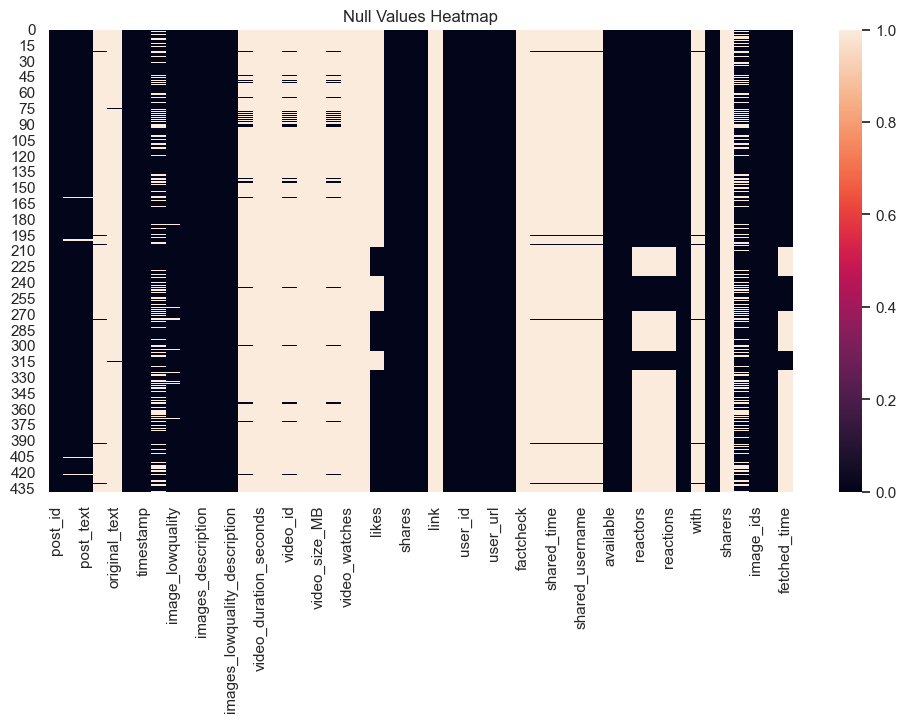

In [569]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_df.isnull(), cbar=True)
plt.title('Null Values Heatmap')
plt.show()

In [570]:
data_df.isnull().sum()

post_id                            0
text                               4
post_text                          4
shared_text                      432
original_text                    436
time                               0
timestamp                          0
image                            120
image_lowquality                   9
images                             0
images_description                 0
images_lowquality                  0
images_lowquality_description      0
video                            416
video_duration_seconds           438
video_height                     438
video_id                         416
video_quality                    438
video_size_MB                    438
video_thumbnail                  416
video_watches                    438
video_width                      438
likes                            257
comments                           0
shares                             0
post_url                           0
link                             438
l

Ở trên trong bản đồ nhiệt và bảng, chúng ta có thể thấy rằng có khá nhiều giá trị null trong tập dữ liệu. Có tổng cộng 9.898 giá trị null trên toàn bộ tập dữ liệu với 4 giá trị null trong `text`, 4 giá trị null trong `post_text`, 432 trong `share_text`, 436 trong `original_text` và nhiều trường khác. Chúng ta sẽ phải xử lý tất cả các điểm dữ liệu null.

In [571]:
data_df.dropna(subset=['text', 'post_text'], inplace=True)

Loại bỏ các bài đăng không chứa nội dung.

In [572]:
data_df = data_df.dropna(axis=1, how='all')
data_df = data_df.loc[:, (data_df.isnull().sum(axis=0) < 416)]
data_df.shape

(434, 34)

Loại bỏ một số cột có giá trị null nhiều, không đem lại nhiều thông tin cho bài phân tích.

In [573]:
data_df['video_id'].fillna(data_df['video_id'].mean(), inplace=True)
data_df['image_id'].fillna(data_df['image_id'].mean(), inplace=True)
data_df['fetched_time'].fillna(method='ffill', inplace=True)
data_df['image'].fillna('Image Unavailable', inplace=True)
data_df['video'].fillna('Video Unavailable', inplace=True)
data_df = data_df.dropna(subset=['reactions'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13004\2898418022.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['fetched_time'].fillna(method='ffill', inplace=True)


Đối với các giá trị null, cách dễ nhất để loại bỏ chúng là xóa các hàng có dữ liệu bị thiếu. Tuy nhiên, điều này sẽ không có lợi vì mất thông tin. Một số cột quan trọng cho việc phân tích ta sẽ thay thế giá trị còn thiếu là không có sẵn, phần còn lại chứa một phần giá trị không đáng kể nên ta sẽ xóa chúng khỏi tập dữ liệu.

In [574]:
data_df.shape

(255, 34)

In [575]:
data_df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322],
      dtype='int64', length=255)

In [576]:
data_df.index = np.arange(0, len(data_df))

In [577]:
data_df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254],
      dtype='int32', length=255)

## Xử lý reactions

In [578]:
data_df['reactions']

0      {'thích': 1472, 'yêu thích': 175, 'haha': 615,...
1      {'thích': 3075, 'yêu thích': 16, 'haha': 2274,...
2      {'thích': 3029, 'yêu thích': 16, 'haha': 4737,...
3      {'thích': 3898, 'yêu thích': 2, 'haha': 5, 'th...
4      {'thích': 1889, 'yêu thích': 5, 'haha': 750, '...
                             ...                        
250    {'thích': 3133, 'yêu thích': 20, 'haha': 2501,...
251    {'thích': 2753, 'yêu thích': 23, 'haha': 1259,...
252    {'thích': 2695, 'yêu thích': 21, 'haha': 2971,...
253    {'thích': 4869, 'yêu thích': 17, 'haha': 1135,...
254    {'thích': 2198, 'yêu thích': 29, 'haha': 517, ...
Name: reactions, Length: 255, dtype: object

In [579]:
data_df['reactions'].iloc[200]

"{'thích': 1134, 'yêu thích': 10, 'haha': 650, 'wow': 1, 'thương thương': 3, 'buồn': 176}"

In [580]:
data_df.shape

(255, 34)

In [581]:
data_df['reactions'] = data_df['reactions'].apply(lambda i : dict(eval(i)))
reac_df = data_df['reactions'].apply(pd.Series)

data_reac = pd.concat([data_df, reac_df], axis=1).drop('reactions', axis=1)
data_reac[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares','comments','reaction_count']]

post_text   thích  yêu thích  \
0    Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...  1472.0      175.0   
1    Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...  3075.0       16.0   
2                                     Tôi của sau này:  3029.0       16.0   
3    Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...  3898.0        2.0   
4    Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...  1889.0        5.0   
..                                                 ...     ...        ...   
250                     Xuống nhặt rau cho mẹ đi này 😀  3133.0       20.0   
251                                         Lười đăng.  2753.0       23.0   
252                                 Juan hoi nay rui 👍  2695.0       21.0   
253                            Z đi cho nó nhanh 💁🏻‍♀️  4869.0       17.0   
254            Thế là hết luôn ngày Chủ Nhật rồi đấy 🤗  2198.0       29.0   

       haha  wow    buồn  phẫn nộ  thương thương  shares  comments  \
0     615.0  NaN    33.0      NaN           14.0     112       135   
1    2274.0  1.0    33.0      NaN            3.0      88       116   
2    4737.0  5.0   102.0      1.0            5.0      90       192   
3       5.0  NaN     1.0      NaN            1.0       0        28   
4     750.0  1.0   516.0      2.0            4.0     123       284   
..      ...  ...     ...      ...            ...     ...       ...   
250  2501.0  1.0  1068.0      NaN            4.0     250       787   
251  1259.0  3.0   611.0      1.0            4.0      49       198   
252  2971.0  4.0    66.0      1.0           11.0     149       404   
253  1135.0  5.0   166.0      NaN            4.0      64       417   
254   517.0  3.0   914.0      3.0            5.0     155       240   

     reaction_count  
0              2309  
1              5402  
2              7895  
3              3907  
4              3167  
..              ...  
250            6727  
251            4654  
252            5769  
253            6196  
254            3669  

[255 rows x 11 columns]

In [582]:
for column in ['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares']:
    data_reac[column].fillna(0, inplace=True)
data_reac[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares','comments','reaction_count']]

post_text   thích  yêu thích  \
0    Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...  1472.0      175.0   
1    Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...  3075.0       16.0   
2                                     Tôi của sau này:  3029.0       16.0   
3    Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...  3898.0        2.0   
4    Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...  1889.0        5.0   
..                                                 ...     ...        ...   
250                     Xuống nhặt rau cho mẹ đi này 😀  3133.0       20.0   
251                                         Lười đăng.  2753.0       23.0   
252                                 Juan hoi nay rui 👍  2695.0       21.0   
253                            Z đi cho nó nhanh 💁🏻‍♀️  4869.0       17.0   
254            Thế là hết luôn ngày Chủ Nhật rồi đấy 🤗  2198.0       29.0   

       haha  wow    buồn  phẫn nộ  thương thương  shares  comments  \
0     615.0  0.0    33.0      0.0           14.0     112       135   
1    2274.0  1.0    33.0      0.0            3.0      88       116   
2    4737.0  5.0   102.0      1.0            5.0      90       192   
3       5.0  0.0     1.0      0.0            1.0       0        28   
4     750.0  1.0   516.0      2.0            4.0     123       284   
..      ...  ...     ...      ...            ...     ...       ...   
250  2501.0  1.0  1068.0      0.0            4.0     250       787   
251  1259.0  3.0   611.0      1.0            4.0      49       198   
252  2971.0  4.0    66.0      1.0           11.0     149       404   
253  1135.0  5.0   166.0      0.0            4.0      64       417   
254   517.0  3.0   914.0      3.0            5.0     155       240   

     reaction_count  
0              2309  
1              5402  
2              7895  
3              3907  
4              3167  
..              ...  
250            6727  
251            4654  
252            5769  
253            6196  
254            3669  

[255 rows x 11 columns]

## Xử lý comments và reactors

In [583]:
data_df['comments'].duplicated().sum()

26

In [584]:
data_df['comments'].mean()

580.1882352941177

In [585]:
data_df.shape

(255, 34)

In [586]:
data_df['comments']

0      135
1      116
2      192
3       28
4      284
      ... 
250    787
251    198
252    404
253    417
254    240
Name: comments, Length: 255, dtype: int64

In [587]:
data_df['comments_full'] = data_df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [588]:
data_df['comments_full'].iloc[0]

[{'comment_id': '1146790583397075',
  'comment_url': 'https://facebook.com/1146790583397075',
  'commenter_id': '100010619473461',
  'commenter_url': 'https://facebook.com/profile.php?id=100010619473461&eav=Afbxp4ElVevDudqbHhQZ1GPgWYDZROP160U9lGoiJnD-7CoO2rOHt_FflViBBAZmaAs&fref=nf&rc=p&refid=52&__tn__=R&paipv=0',
  'commenter_name': 'Nam Trần',
  'commenter_meta': None,
  'comment_text': 'Chủ nhật vẫn phải đii làm 🙃🙃🙃',
  'comment_time': datetime.datetime(2023, 11, 2, 0, 0),
  'comment_image': 'https://scontent.fhan14-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AfAYR-_cpFYsf8EwyS8oFfaqWrpW4pbN9od3PL8AdF4DHA&oe=658A52B9&_nc_sid=7da55a',
  'comment_reactors': [{'name': 'Truong Trang',
    'link': 'https://facebook.com/minhtrang.truongthi?eav=AfYOVPd-vy_ix75svT7anEfv5HJNlMO4TIkF2O27HJgakNDWQ24sUGlJX3TknOGOe6E&fref=pb&paipv=0',
    'type': 'like'}],
  'comment_reactions': {'like

In [589]:
data_df['comments_full']

0      [{'comment_id': '1146790583397075', 'comment_u...
1      [{'comment_id': '1044127293489046', 'comment_u...
2      [{'comment_id': '727617178779138', 'comment_ur...
3      [{'comment_id': '648685764136210', 'comment_ur...
4      [{'comment_id': '2362913863891507', 'comment_u...
                             ...                        
250    [{'comment_id': '191876703579535', 'comment_ur...
251    [{'comment_id': '171745905901563', 'comment_ur...
252    [{'comment_id': '226843926968976', 'comment_ur...
253    [{'comment_id': '659881748971585', 'comment_ur...
254    [{'comment_id': '261672819839777', 'comment_ur...
Name: comments_full, Length: 255, dtype: object

In [590]:
data_df['reactors'] = data_df['reactors'].apply(eval)

In [591]:
data_df['reactors'][5][3]

{'name': 'Nguyễn Trương Đan Quế',
 'link': 'https://facebook.com/danquenguyentruong?eav=AfYCI4Jg7hfbV6cHcLtsg257nXcb-GxcgmFlptKoxVDSxVBhkoLIMsTXFl1eralo3eo&fref=pb&paipv=0',
 'type': 'haha'}

## Xử lý văn bản

In [592]:
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read()

Loại bỏ các stop words và các từ có độ dài < 3

In [593]:
def counts_word(df):
    
    mapping = dict.fromkeys(map(ord, string.punctuation))
    
    words = {}
    for x in df['post_text']:
        try:
            seperated_words = x.split(' ')
        except:
            pass
        for word in seperated_words:
            word = word.strip()
            word = word.lower()
            word = word.translate(mapping)
            if(word) in stop_words:
                continue
            if(len(word) < 3):
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    return words

In [594]:
words = counts_word(data_df)

## Xử lý commenter

In [595]:
info_df = pd.read_csv('Data/Final/User.csv')
info_df.head()

Friend_count  Follower_count  Following_count  \
0           NaN             NaN              NaN   
1           NaN             NaN              NaN   
2           NaN             NaN              NaN   
3           NaN             NaN              NaN   
4           NaN             NaN              NaN   

                                         cover_photo  \
0  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
1                                                NaN   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
3                                                NaN   
4  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                     profile_picture               id  \
0  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100010619473461   
1  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100011546892553   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100023102652874   
3  https://scontent.fhan2-3.fna.fbcdn.net/v/t1.30...  100023706877712   
4  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100001166561768   

                     Name                                      Nơi từng sống  \
0                Nam Trần  Huế\nTỉnh/Thành phố hiện tại\nThuy Duong, Binh...   
1          Trần Hoài Dinh                Binh Luc, Hà Nam, Vietnam\nQuê quán   
2  Nguyễn Huỳnh Trung Tín  Chaudok, An Giang, Vietnam\nTỉnh/Thành phố hiệ...   
3              Hoang Phuc                                                NaN   
4              Chu Phương                                Hải Phòng\nQuê quán   

                                             Học vấn  \
0                                                NaN   
1                                                NaN   
2  THCS Nguyễn Đình Chiểu - Châu Đốc\nCao đẳng/Đạ...   
3                                                NaN   
4  Trường Cao Đẳng Du Lịch Hải Phòng\nLễ Tân\nTHP...   

                                           Công việc  ... Giới thiệu về Ly Na  \
0                                                NaN  ...                 NaN   
1                                                NaN  ...                 NaN   
2                                                NaN  ...                 NaN   
3                                                NaN  ...                 NaN   
4  Gấu mèo shop\nLittle boss\nTháng 12 năm 2011 -...  ...                 NaN   

  Giới thiệu về Bảo Khanh Giới thiệu về Nhat Giới thiệu về Thuý  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   

  Giới thiệu về Tuấn San Giới thiệu về Nhi Giới thiệu về Duy Ngọc  \
0                    NaN               NaN                    NaN   
1                    NaN               NaN                    NaN   
2                    NaN               NaN                    NaN   
3                    NaN               NaN                    NaN   
4                    NaN               NaN                    NaN   

  Giới thiệu về Mai Trang Giới thiệu về Le Ngoc Giới thiệu về Bùi  
0                     NaN                   NaN               NaN  
1                     NaN                   NaN               NaN  
2                     NaN                   NaN               NaN  
3                     NaN                   NaN               NaN  
4                     NaN                   NaN               NaN  

[5 rows x 62 columns]

In [596]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Friend_count              0 non-null      float64
 1   Follower_count            0 non-null      float64
 2   Following_count           0 non-null      float64
 3   cover_photo               385 non-null    object 
 4   profile_picture           718 non-null    object 
 5   id                        718 non-null    int64  
 6   Name                      718 non-null    object 
 7   Nơi từng sống             500 non-null    object 
 8   Học vấn                   359 non-null    object 
 9   Công việc                 159 non-null    object 
 10  Giới thiệu về Quyen       1 non-null      object 
 11  Trích dẫn yêu thích       62 non-null     object 
 12  Giới thiệu về Phương      2 non-null      object 
 13  Giới thiệu về Lan Anh     1 non-null      object 
 14  Giới thiệu

In [597]:
columns_to_keep = info_df.columns[3:10]
info_df = info_df[columns_to_keep]

In [598]:
info_df.head()

cover_photo  \
0  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
1                                                NaN   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
3                                                NaN   
4  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                     profile_picture               id  \
0  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100010619473461   
1  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100011546892553   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100023102652874   
3  https://scontent.fhan2-3.fna.fbcdn.net/v/t1.30...  100023706877712   
4  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100001166561768   

                     Name                                      Nơi từng sống  \
0                Nam Trần  Huế\nTỉnh/Thành phố hiện tại\nThuy Duong, Binh...   
1          Trần Hoài Dinh                Binh Luc, Hà Nam, Vietnam\nQuê quán   
2  Nguyễn Huỳnh Trung Tín  Chaudok, An Giang, Vietnam\nTỉnh/Thành phố hiệ...   
3              Hoang Phuc                                                NaN   
4              Chu Phương                                Hải Phòng\nQuê quán   

                                             Học vấn  \
0                                                NaN   
1                                                NaN   
2  THCS Nguyễn Đình Chiểu - Châu Đốc\nCao đẳng/Đạ...   
3                                                NaN   
4  Trường Cao Đẳng Du Lịch Hải Phòng\nLễ Tân\nTHP...   

                                           Công việc  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Gấu mèo shop\nLittle boss\nTháng 12 năm 2011 -...

In [599]:
info_df.drop_duplicates(subset=['id'], inplace=True)

info_df['cover_photo'].fillna('Cover Photo Unavailable', inplace=True)
info_df['Nơi từng sống'].fillna('Value Unavailable', inplace=True)
info_df['Học vấn'].fillna('Value Unavailable', inplace=True)
info_df['Công việc'].fillna('Value Unavailable', inplace=True)

In [600]:
info_df.head()

cover_photo  \
0  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
1                            Cover Photo Unavailable   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
3                            Cover Photo Unavailable   
4  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                     profile_picture               id  \
0  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100010619473461   
1  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100011546892553   
2  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100023102652874   
3  https://scontent.fhan2-3.fna.fbcdn.net/v/t1.30...  100023706877712   
4  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100001166561768   

                     Name                                      Nơi từng sống  \
0                Nam Trần  Huế\nTỉnh/Thành phố hiện tại\nThuy Duong, Binh...   
1          Trần Hoài Dinh                Binh Luc, Hà Nam, Vietnam\nQuê quán   
2  Nguyễn Huỳnh Trung Tín  Chaudok, An Giang, Vietnam\nTỉnh/Thành phố hiệ...   
3              Hoang Phuc                                  Value Unavailable   
4              Chu Phương                                Hải Phòng\nQuê quán   

                                             Học vấn  \
0                                  Value Unavailable   
1                                  Value Unavailable   
2  THCS Nguyễn Đình Chiểu - Châu Đốc\nCao đẳng/Đạ...   
3                                  Value Unavailable   
4  Trường Cao Đẳng Du Lịch Hải Phòng\nLễ Tân\nTHP...   

                                           Công việc  
0                                  Value Unavailable  
1                                  Value Unavailable  
2                                  Value Unavailable  
3                                  Value Unavailable  
4  Gấu mèo shop\nLittle boss\nTháng 12 năm 2011 -...

In [601]:
info_df['Nơi từng sống'] = info_df['Nơi từng sống'].apply(lambda x: str(x) if x is not None and pd.notna(x) else None)

info_df['Nơi ở hiện tại'] = info_df['Nơi từng sống'].apply(lambda x: re.search(r'Thành phố hiện tại\n(.*?)\n', str(x)).group(1) if re.search(r'Thành phố hiện tại\n(.*?)\n', str(x)) else None)


In [602]:
def process(hometown):
   
    if isinstance(hometown, str):
        temp = hometown.split(', ')
        if len(temp) == 3:
            return temp[1]
        elif len(temp) == 2:
            return temp[0]
    return hometown

info_df['Nơi ở hiện tại'] = info_df['Nơi ở hiện tại'].apply(process)

In [603]:
info_df['Nơi ở hiện tại'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 718 entries, 0 to 717
Series name: Nơi ở hiện tại
Non-Null Count  Dtype 
--------------  ----- 
262 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


In [604]:
def education(education):
  if isinstance(education, str):  
    if 'THPT' in education:
        return 'THPT'
    elif 'Đại học' in education:
        return 'Đại học'
    elif 'THCS' in education or 'Trung học cơ sở' in education:
        return 'THCS'
    elif 'Cao đẳng' in education:
        return 'Cao đẳng'
    elif 'University' in education:
        return 'Đại học'
    else:
        return 'Other'  

info_df['Trình độ học vấn'] = info_df['Học vấn'].apply(education)

In [605]:
info_df.dropna(subset=['Trình độ học vấn'], inplace=True)

In [606]:
info_df['Trình độ học vấn']

0        Other
1        Other
2      Đại học
3        Other
4         THPT
        ...   
713       THPT
714       THPT
715       THPT
716      Other
717      Other
Name: Trình độ học vấn, Length: 718, dtype: object

In [607]:
# Save
path='Data/'
info_df.to_csv(path + 'cmter' + '.csv', index=False)

post_np_full = np.array(info_df)
np.save(path + "cmter.npy", post_np_full)

cols = np.array(data_df.columns)
np.save(path + "cmter_cols.npy", cols)

## Tách tập dữ liệu

Vì tập dữ liệu có thể chứa hình ảnh hoặc video nên sẽ dễ quan sát hơn nếu có tập dữ liệu cho cả hai để chúng ta có thể tìm hiểu sâu hơn về hình ảnh hoặc video nên chúng ta sẽ tạo hai tập dữ liệu mới. Một cho hình ảnh và một cho video.

In [608]:
images_df = data_df[data_df['image'] != 'Image Unavailable'].copy()
images_df.head()

post_id                                               text  \
0  372350952151112  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...   
2  371894908863383                                   Tôi của sau này:   
3  370353522350855  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...   
5  371371782249029                                             Ừ ý :)   
6  370939178958956  Đông kiếm người yêu khỏi phải làm\nChỉ cần nằm...   

                                           post_text                 time  \
0  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...  2023-11-26 11:35:48   
2                                   Tôi của sau này:  2023-11-25 15:18:19   
3  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...  2023-11-24 20:00:03   
5                                             Ừ ý :)  2023-11-24 14:43:35   
6  Đông kiếm người yêu khỏi phải làm\nChỉ cần nằm...  2023-11-23 19:00:33   

    timestamp                                              image  \
0  1700973348  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
2  1700900299  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  1700830803  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
5  1700811815  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
6  1700740833  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                    image_lowquality  \
0  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
2  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
5  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
6  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                              images  \
0  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...   
2  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...   
5  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...   
6  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...   

                                  images_description  \
0         ['Có thể là hình ảnh về chó và phòng ngủ']   
2  ['Có thể là hình ảnh về văn bản cho biết \'Doc...   
3  ["Có thể là hình ảnh về 2 người và văn bản cho...   
5  ["Có thể là hình vẽ ngẫu hứng về 2 người, đền ...   
6  ["Có thể là hình ảnh về văn bản cho biết 'Lý t...   

                                   images_lowquality  ...  \
0  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...  ...   
2  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...  ...   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...   
5  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...   
6  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...   

                                       comments_full  \
0  [{'comment_id': '1146790583397075', 'comment_u...   
2  [{'comment_id': '727617178779138', 'comment_ur...   
3  [{'comment_id': '648685764136210', 'comment_ur...   
5  [{'comment_id': '7065406946816019', 'comment_u...   
6  [{'comment_id': '358161666863705', 'comment_ur...   

                                            reactors  \
0                                                 []   
2  [{'name': 'Minh Nguyen', 'link': 'https://face...   
3  [{'name': 'Vân Trang Lê', 'link': 'https://fac...   
5  [{'name': 'Hồ Như Xuân', 'link': 'https://face...   
6  [{'name': 'Lê Thương Khue', 'link': 'https://f...   

                                           w3_fb_url  \
0  https://www.facebook.com/luoi.vn/posts/3723509...   
2  https://www.facebook.com/luoi.vn/posts/3718949...   
3  https://www.facebook.com/luoi.vn/posts/3703535...   
5  https://www.facebook.com/luoi.vn/posts/3713717...   
6  https://www.facebook.com/luoi.vn/posts/3709391...   

                                           reactions  reaction_count  \
0  {'thích': 1472, 'yêu thích': 175, 'haha': 615,...            2309   
2  {'thích': 3029, 'yêu thích': 16, 'haha': 4737,...            7895   
3  {'thích': 3898, 'yêu thích': 2, 'haha': 5, 'th...            3907   
5  {'thích': 1519, 'yêu

In [609]:
videos_df = data_df[data_df['video'] != 'Video Unavailable'].copy()
videos_df.head()

post_id                                               text  \
20  367008599352014  Hixxxx\n\nĐài Tiếng Nói GenZ\n16 tháng 11 lúc ...   
43  360571646662376                   Mãi mới hẹn nhau tập được =)))))   
48  359058266813714  Anh hồng anh xanh, hai anh quốc dân, anh nào c...   
50  358572373528970  😀Khi đối diện với bất kỳ vấn đề khó khăn nào t...   
64  353493957370145                                    It's suy time 🥲   

                                            post_text                 time  \
20                                             Hixxxx  2023-11-16 11:05:00   
43                   Mãi mới hẹn nhau tập được =)))))  2023-11-04 16:00:24   
48  Anh hồng anh xanh, hai anh quốc dân, anh nào c...  2023-11-01 19:01:10   
50  😀Khi đối diện với bất kỳ vấn đề khó khăn nào t...  2023-10-31 20:34:29   
64                                    It's suy time 🥲  2023-10-22 20:59:15   

     timestamp              image  \
20  1700107500  Image Unavailable   
43  1699088424  Image Unavailable   
48  1698840070  Image Unavailable   
50  1698759269  Image Unavailable   
64  1697983155  Image Unavailable   

                                     image_lowquality images  \
20  https://scontent.fhan14-1.fna.fbcdn.net/v/t15....     []   
43  https://scontent.fhan14-2.fna.fbcdn.net/v/t15....     []   
48  https://scontent.fhan14-3.fna.fbcdn.net/v/t15....     []   
50  https://scontent.fhan14-4.fna.fbcdn.net/v/t15....     []   
64  https://scontent.fhan14-3.fna.fbcdn.net/v/t15....     []   

   images_description                                  images_lowquality  ...  \
20                 []  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t1...  ...   
43                 []  ['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...  ...   
48                 []  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...  ...   
50                 []  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...  ...   
64                 []  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...  ...   

                                        comments_full  \
20  [{'comment_id': '661602599448489', 'comment_ur...   
43  [{'comment_id': '1104489307593827', 'comment_u...   
48  [{'comment_id': '1234792224579341', 'comment_u...   
50  [{'comment_id': '6995626160501459', 'comment_u...   
64  [{'comment_id': '712068080347043', 'comment_ur...   

                                             reactors  \
20  [{'name': 'Phan Anh Quốc', 'link': 'https://fa...   
43  [{'name': 'Loann Ng', 'link': 'https://faceboo...   
48  [{'name': 'Phan Ngọc Yến', 'link': 'https://fa...   
50  [{'name': 'Nhã Yến Phạm', 'link': 'https://fac...   
64  [{'name': 'Phương Phạm', 'link': 'https://face...   

                                            w3_fb_url  \
20  https://www.facebook.com/luoi.vn/posts/3670085...   
43  https://www.facebook.com/luoi.vn/posts/3605716...   
48  https://www.facebook.com/luoi.vn/posts/3590582...   
50  https://www.facebook.com/luoi.vn/posts/3585723...   
64  https://www.facebook.com/luoi.vn/posts/3534939...   

                                            reactions  reaction_count  \
20  {'thích': 84, 'yêu thích': 3, 'haha': 160, 'wo...             259   
43  {'thích': 754, 'yêu thích': 3, 'haha': 373, 'w...            1152   
48  {'thích': 3652, 'yêu thích': 4, 'haha': 4, 'wo...            3662   
50  {'thích': 3010, 'yêu thích': 3, 'haha': 13, 'w...            3033   
64  {'thích': 2016, 'yêu thích': 33, 'haha': 649, ...            5437   

            page_id      image_id image_ids was_live  \
20  112642846927532  3.460854e+14        []    False   
43  112642846927532  3.460854e+14        []    False   
48  112642846927532  3.460854e+14        []    False   
50  112642846927532  3.460854e+14        []    False   
64  112642846927532  3.460854e+14        []    False   

                  fetched_time  
20  2023-11-26 14:42:46.482796  
43  2023-11-26 14:53:00.158777  
48  2023-11-26 14:55:06.533397  
50  2023-11-26 14:55:47.659268  
64  2023-11-26 15:01:13.435402  


## Lưu data sau khi đã tiền xử lý và làm sạch

In [610]:
# Save
path='Data/'
data_df.to_csv(path + 'luoi.vn_cleaned' + '.csv', index=False)

post_np_full = np.array(data_df)
np.save(path + "luoi.vn_cleaned.npy", post_np_full)

cols = np.array(data_df.columns)
np.save(path + "luoi.vn_cleaned_cols.npy", cols)

# Phân tích và trực quan hóa dữ liệu

Đầu tiên chúng ta sẽ bắt đầu phân tích toàn bộ tập dữ liệu bao gồm cả hình ảnh và video.

In [611]:
data_df.head()

post_id                                               text  \
0  372350952151112  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...   
1  372036668849207  Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...   
2  371894908863383                                   Tôi của sau này:   
3  370353522350855  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...   
4  371373332248874  Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...   

                                           post_text                 time  \
0  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...  2023-11-26 11:35:48   
1  Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...  2023-11-25 21:09:38   
2                                   Tôi của sau này:  2023-11-25 15:18:19   
3  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...  2023-11-24 20:00:03   
4  Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...  2023-11-24 14:48:24   

    timestamp                                              image  \
0  1700973348  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
1  1700921378                                  Image Unavailable   
2  1700900299  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  1700830803  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  1700812104                                  Image Unavailable   

                                    image_lowquality  \
0  https://scontent.fhan14-1.fna.fbcdn.net/v/t39....   
1  https://scontent.fhan14-1.fna.fbcdn.net/m1/v/t...   
2  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
3  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-1.fna.fbcdn.net/m1/v/t...   

                                              images  \
0  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...   
1                                                 []   
2  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...   
4                                                 []   

                                  images_description  \
0         ['Có thể là hình ảnh về chó và phòng ngủ']   
1                                                 []   
2  ['Có thể là hình ảnh về văn bản cho biết \'Doc...   
3  ["Có thể là hình ảnh về 2 người và văn bản cho...   
4                                                 []   

                                   images_lowquality  ...  \
0  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...  ...   
1  ['https://scontent.fhan14-1.fna.fbcdn.net/m1/v...  ...   
2  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...  ...   
3  ['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...  ...   
4  ['https://scontent.fhan14-1.fna.fbcdn.net/m1/v...  ...   

                                       comments_full  \
0  [{'comment_id': '1146790583397075', 'comment_u...   
1  [{'comment_id': '1044127293489046', 'comment_u...   
2  [{'comment_id': '727617178779138', 'comment_ur...   
3  [{'comment_id': '648685764136210', 'comment_ur...   
4  [{'comment_id': '2362913863891507', 'comment_u...   

                                            reactors  \
0                                                 []   
1  [{'name': 'Phan Linh Hòa', 'link': 'https://fa...   
2  [{'name': 'Minh Nguyen', 'link': 'https://face...   
3  [{'name': 'Vân Trang Lê', 'link': 'https://fac...   
4  [{'name': 'Vân Trang Lê', 'link': 'https://fac...   

                                           w3_fb_url  \
0  https://www.facebook.com/luoi.vn/posts/3723509...   
1  https://www.facebook.com/luoi.vn/posts/3720366...   
2  https://www.facebook.com/luoi.vn/posts/3718949...   
3  https://www.facebook.com/luoi.vn/posts/3703535...   
4  https://www.facebook.com/luoi.vn/posts/3713733...   

                                           reactions  reaction_count  \
0  {'thích': 1472, 'yêu thích': 175, 'haha': 615,...            2309   
1  {'thích': 3075, 'yêu thích': 16, 'haha': 2274,...            5402   
2  {'thích': 3029, 'yêu thích': 16, 'haha': 4737,...            7895   
3  {'thích': 3898, 'yêu

## Kiểu bài viết: Ảnh hay Video

Ta so sánh giữa tổng số hình ảnh và video trong tập dữ liệu để xem loại nào chiếm đa số.

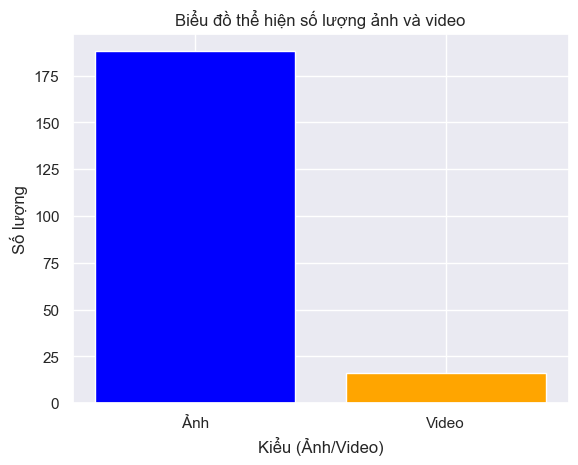

In [612]:
num_images = len(images_df)
num_videos = len(videos_df)
categories = ['Ảnh', 'Video']
counts = [num_images, num_videos]
plt.bar(categories, counts, color=['blue', 'orange'])
plt.title("Biểu đồ thể hiện số lượng ảnh và video")
plt.xlabel("Kiểu (Ảnh/Video)")
plt.ylabel("Số lượng")
plt.show()

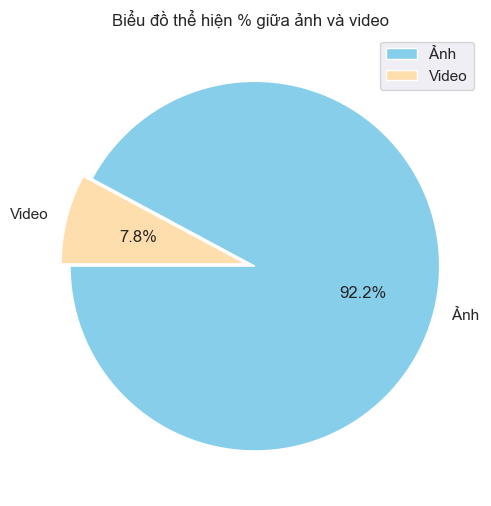

In [613]:
percen_images = (len(images_df) / (len(images_df) + len(videos_df))) * 100
percen_videos = (len(videos_df) / (len(images_df) + len(videos_df))) * 100
labels = ['Ảnh', 'Video']
sizes = [percen_images, percen_videos]
colors = ['skyblue', 'navajowhite']
plt.figure(figsize=(12, 6))
plt.title("Biểu đồ thể hiện % giữa ảnh và video")
plt.pie(sizes, explode=(0.025, 0.025), labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

## Phân tích thời gian hoạt động của page

In [614]:
data_df['total_interactions'] = data_df['reaction_count'] + data_df['comments'] + data_df['shares']

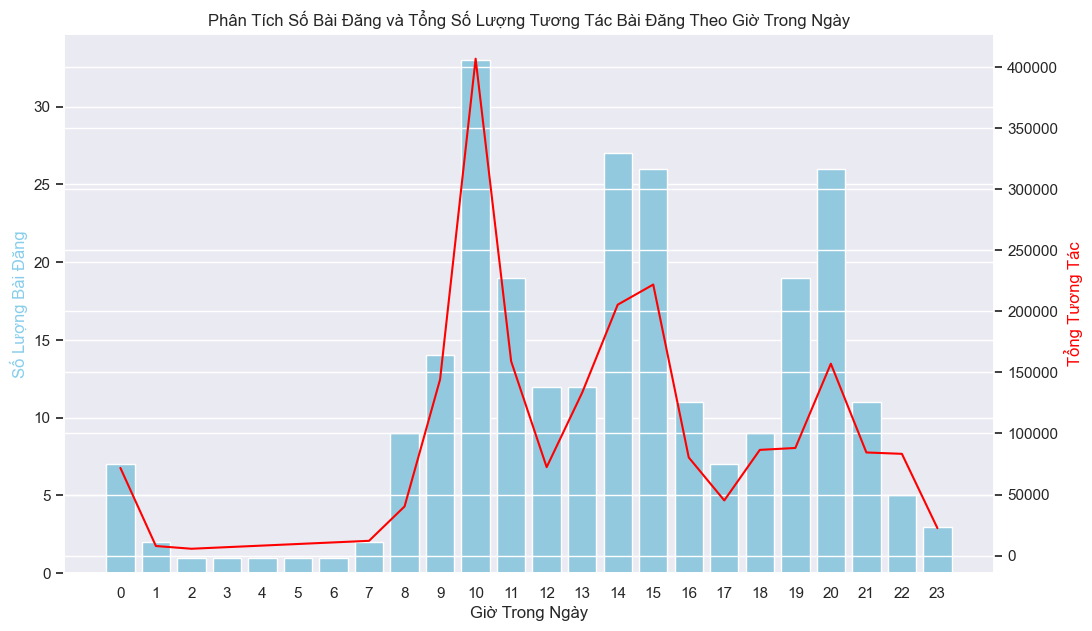

In [615]:
data_df['time'] = pd.to_datetime(data_df['time'])
data_df['hour'] = data_df['time'].dt.hour

all_hours_df = pd.DataFrame({'hour': range(24)})

merged_df = all_hours_df.merge(data_df, on='hour', how='left')

# Phân tích số bài đăng theo giờ trong ngày
plt.figure(figsize=(12, 7))
ax1 = plt.gca()  
sns.countplot(x='hour', data=merged_df, color='skyblue', ax=ax1)
ax1.set_ylabel('Số Lượng Bài Đăng', color='skyblue')
ax1.set_xlabel('Giờ Trong Ngày')

# Trục vẽ biểu đồ tổng tương tác
ax2 = ax1.twinx()
data_df['time_of_day'] = data_df['time'].dt.hour
grouped_data = data_df.groupby('time_of_day')['total_interactions'].sum()
sns.lineplot(x=grouped_data.index, y=grouped_data.values, ax=ax2, color='red')
ax2.set_ylabel('Tổng Tương Tác', color='red')

plt.title('Phân Tích Số Bài Đăng và Tổng Số Lượng Tương Tác Bài Đăng Theo Giờ Trong Ngày')
plt.show()


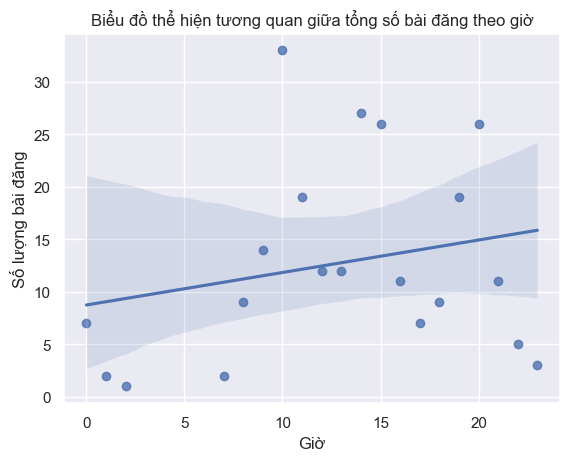

In [616]:
sns.regplot(x=data_df['hour'].value_counts().index, y=data_df['hour'].value_counts().values, fit_reg=True)
plt.title('Biểu đồ thể hiện tương quan giữa tổng số bài đăng theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài đăng')
plt.show()

Dựa vào biểu đồ ta có thể thấy page đăng bài chủ yếu vào các khung giờ là: 10h, 14h, 15h, 20h. Đây có thể gọi là những khung giờ vàng vì có nhiều người truy cập nên tương tác cũng sẽ cao hơn.

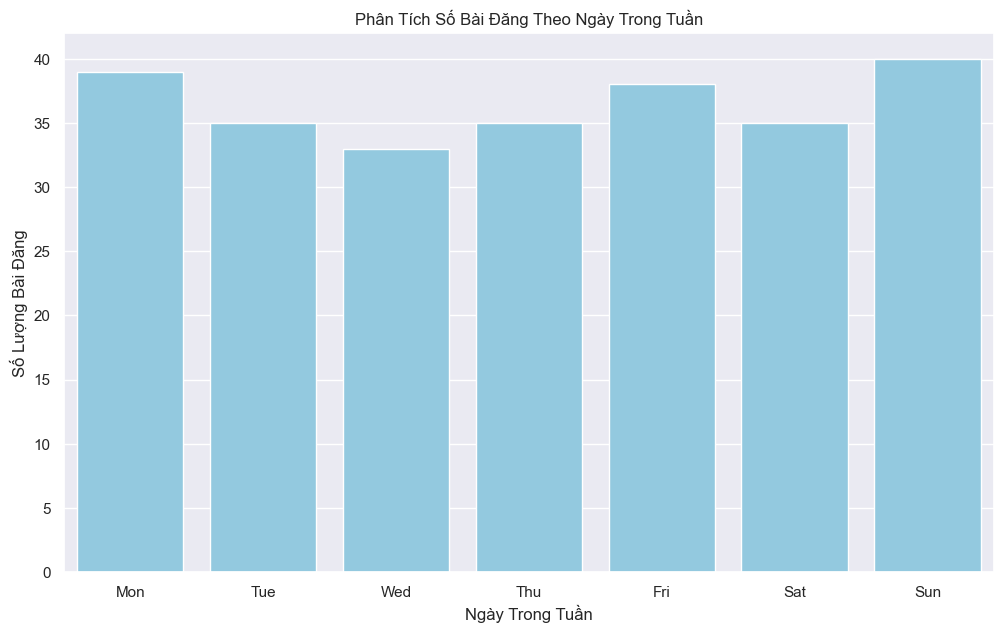

In [617]:
data_df['time'] = pd.to_datetime(data_df['time'])

data_df['day_of_week'] = data_df['time'].dt.dayofweek

days_of_week_df = pd.DataFrame({
    'day_of_week': range(7),
    'day_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
})

merged_df = days_of_week_df.merge(data_df, on='day_of_week', how='left')

# Phân tích số lượt đăng bài theo ngày trong tuần
plt.figure(figsize=(12, 7))
sns.countplot(x='day_of_week', data=merged_df, color='skyblue', order=range(7))

plt.title('Phân Tích Số Bài Đăng Theo Ngày Trong Tuần')
plt.xlabel('Ngày Trong Tuần')
plt.ylabel('Số Lượng Bài Đăng')
plt.xticks(range(7), days_of_week_df['day_name'])
plt.show()


## Phân tích tương tác

In [618]:
df_reac = data_df[['post_id', 'reactions']]
df_reac

post_id                                          reactions
0    372350952151112  {'thích': 1472, 'yêu thích': 175, 'haha': 615,...
1    372036668849207  {'thích': 3075, 'yêu thích': 16, 'haha': 2274,...
2    371894908863383  {'thích': 3029, 'yêu thích': 16, 'haha': 4737,...
3    370353522350855  {'thích': 3898, 'yêu thích': 2, 'haha': 5, 'th...
4    371373332248874  {'thích': 1889, 'yêu thích': 5, 'haha': 750, '...
..               ...                                                ...
250  294537569932451  {'thích': 3133, 'yêu thích': 20, 'haha': 2501,...
251  294449773274564  {'thích': 2753, 'yêu thích': 23, 'haha': 1259,...
252  294354743284067  {'thích': 2695, 'yêu thích': 21, 'haha': 2971,...
253  293975573321984  {'thích': 4869, 'yêu thích': 17, 'haha': 1135,...
254  293954556657419  {'thích': 2198, 'yêu thích': 29, 'haha': 517, ...

[255 rows x 2 columns]

In [619]:
data_reac[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares','comments','reaction_count']].describe()

thích    yêu thích          haha         wow         buồn  \
count    255.000000   255.000000    255.000000  255.000000   255.000000   
mean    4032.803922   112.584314   2570.764706    6.152941   680.145098   
std     5030.373658   375.538332   4990.151484   17.746358  1177.999074   
min       84.000000     0.000000      0.000000    0.000000     0.000000   
25%     1906.500000    10.500000    717.500000    1.000000    69.000000   
50%     2839.000000    25.000000   1388.000000    3.000000   358.000000   
75%     4550.500000    67.000000   2528.500000    6.000000   694.000000   
max    67086.000000  5016.000000  63122.000000  204.000000  9354.000000   

          phẫn nộ  thương thương       shares     comments  reaction_count  
count  255.000000     255.000000   255.000000   255.000000      255.000000  
mean     2.141176      18.003922   346.109804   580.188235     7422.596078  
std     17.485755      76.826346   670.301193   940.008253    10882.891438  
min      0.000000       0.000000     0.000000     6.000000      259.000000  
25%      0.000000       3.000000    61.500000   148.000000     3166.000000  
50%      0.000000       6.000000   155.000000   306.000000     4822.000000  
75%      1.000000      14.000000   334.000000   665.500000     7081.000000  
max    277.000000    1138.000000  5437.000000  9841.000000   141377.000000

In [620]:
data_reac['thích']

0      1472.0
1      3075.0
2      3029.0
3      3898.0
4      1889.0
        ...  
250    3133.0
251    2753.0
252    2695.0
253    4869.0
254    2198.0
Name: thích, Length: 255, dtype: float64

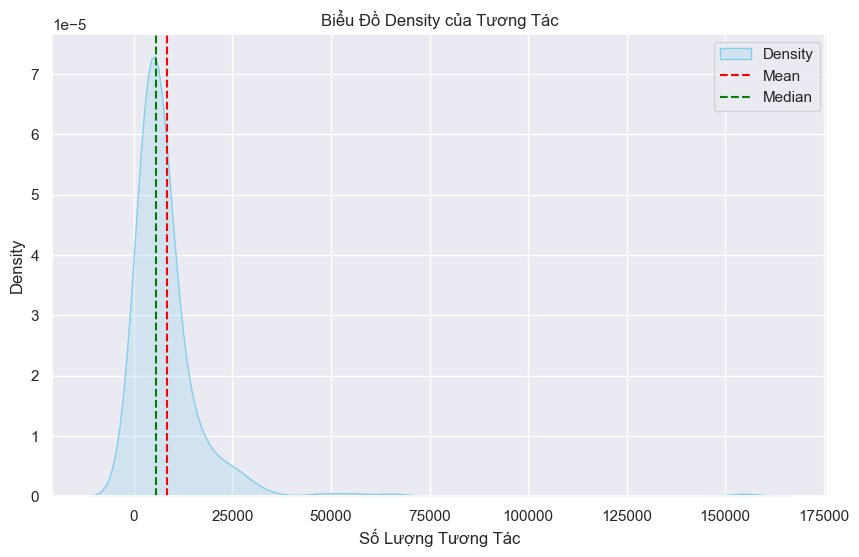

In [621]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_df['total_interactions'], fill=True, color='skyblue', label='Density')

mean_value = data_df['total_interactions'].mean()
median_value = data_df['total_interactions'].median()
plt.axvline(x=mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(x=median_value, color='green', linestyle='--', label='Median')

plt.title('Biểu Đồ Density của Tương Tác')
plt.xlabel('Số Lượng Tương Tác')
plt.ylabel('Density')
plt.legend()
plt.show()


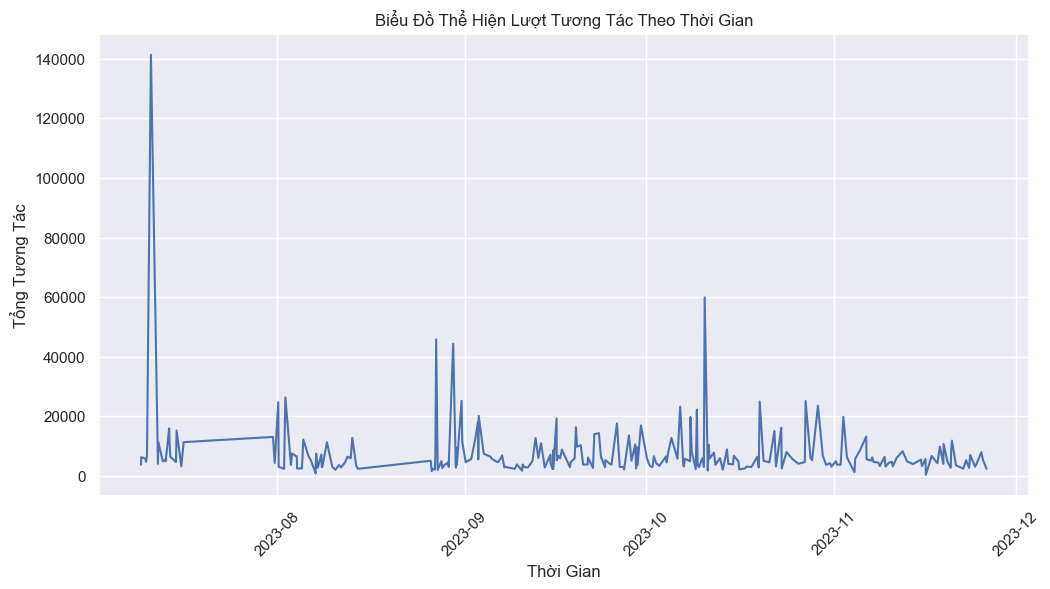

In [622]:
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'], unit='s')

data_df.sort_values(by='timestamp', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data_df['timestamp'], data_df['reaction_count'], linestyle='-')
plt.title('Biểu Đồ Thể Hiện Lượt Tương Tác Theo Thời Gian')
plt.xlabel('Thời Gian')
plt.ylabel('Tổng Tương Tác')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

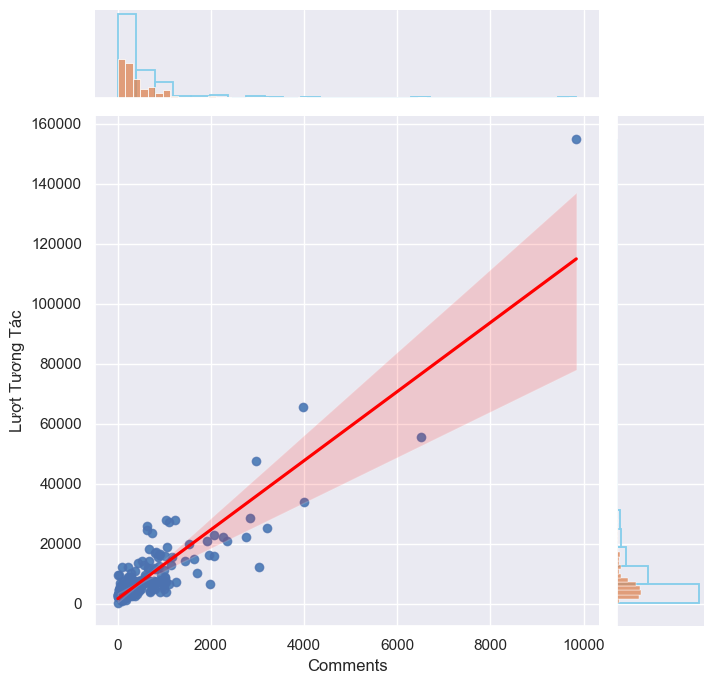

In [623]:
plt.figure(figsize=(12, 6))
joint = sns.jointplot(data=data_df, x='comments', y='total_interactions', kind='scatter', marginal_kws=dict(bins=25, fill=False), color='skyblue', height=7)
joint.plot(sns.regplot, sns.histplot, line_kws={'color': 'red'})
plt.xlabel('Comments')
plt.ylabel('Lượt Tương Tác')
plt.show()


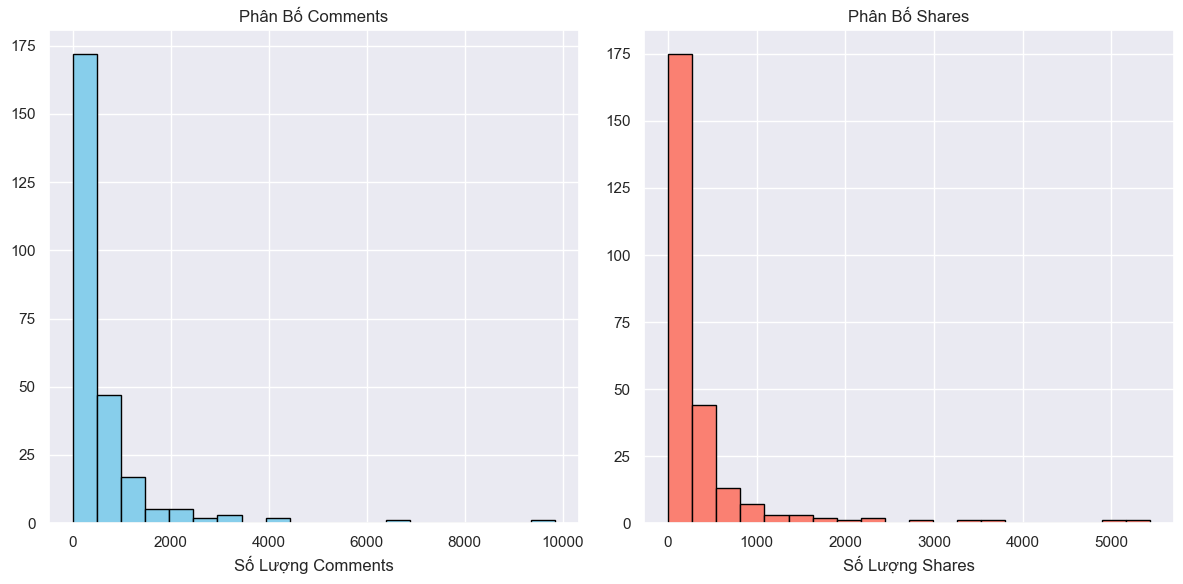

In [624]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_df['comments'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân Bố Comments')
plt.xlabel('Số Lượng Comments')

plt.subplot(1, 2, 2)
plt.hist(data_df['shares'], bins=20, color='salmon', edgecolor='black')
plt.title('Phân Bố Shares')
plt.xlabel('Số Lượng Shares')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

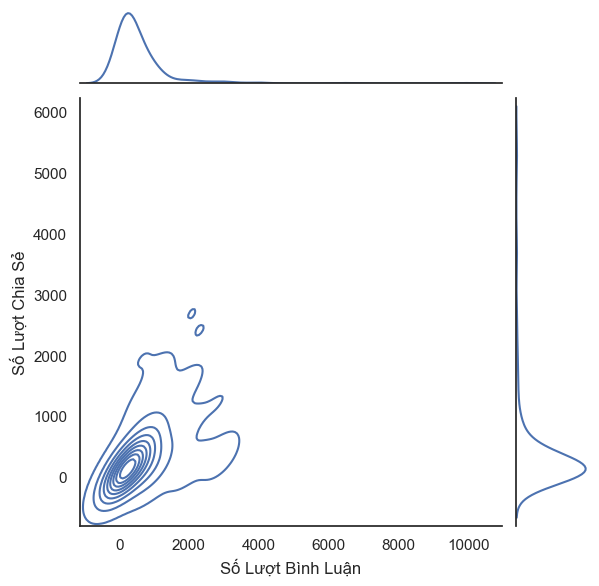

In [625]:
plt.figure(figsize=(10, 6))
sns.set(style="white", color_codes=True)

sns.jointplot(x='comments', y='shares', data=data_df, kind="kde")

plt.xlabel('Số Lượt Bình Luận')
plt.ylabel('Số Lượt Chia Sẻ')
plt.show()

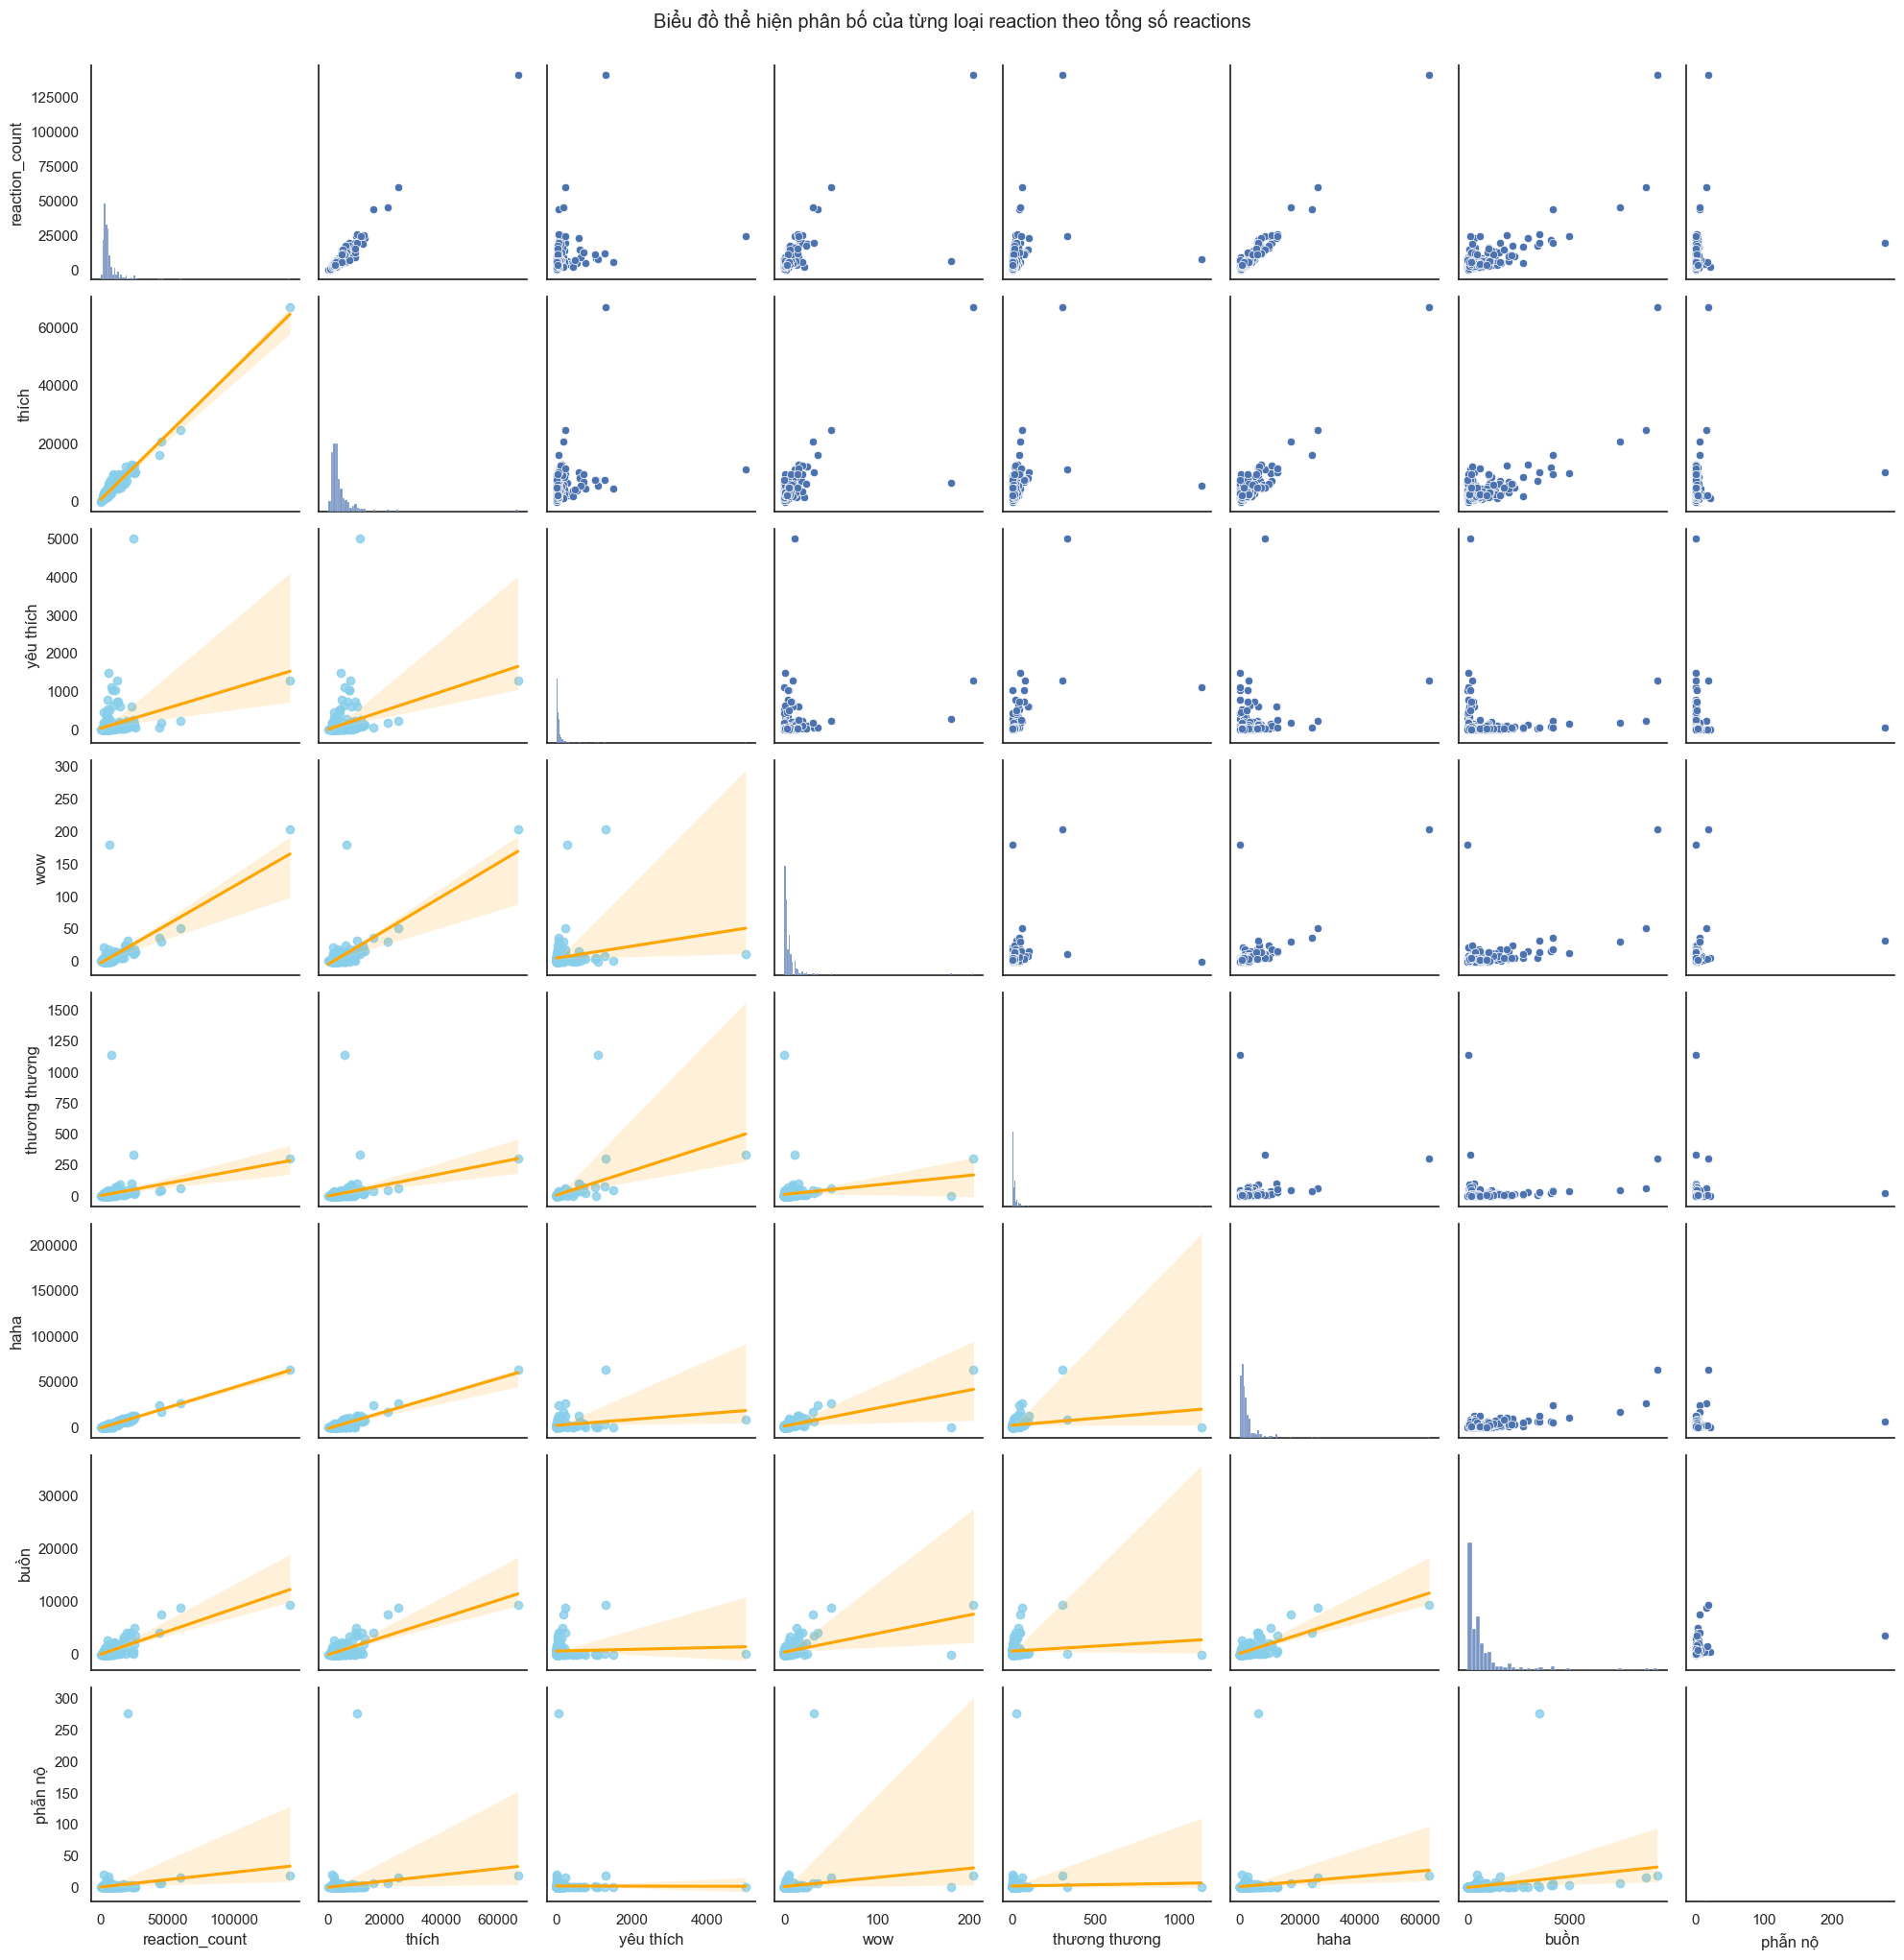

In [626]:
selected_columns = ['reaction_count', 'thích', 'yêu thích', 'wow', 'thương thương', 'haha', 'buồn', 'phẫn nộ']
data_reac_subset = data_reac[selected_columns]

g = sns.PairGrid(data_reac_subset)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})

g.map_lower(sns.regplot, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})

g.fig.tight_layout()

plt.suptitle("Biểu đồ thể hiện phân bố của từng loại reaction theo tổng số reactions", y=1.02)
plt.show()


Text(0.5, 0.98, 'Biểu đồ thể hiện sự biến động về số lượng của từng loại cảm xúc theo từng bài viết')

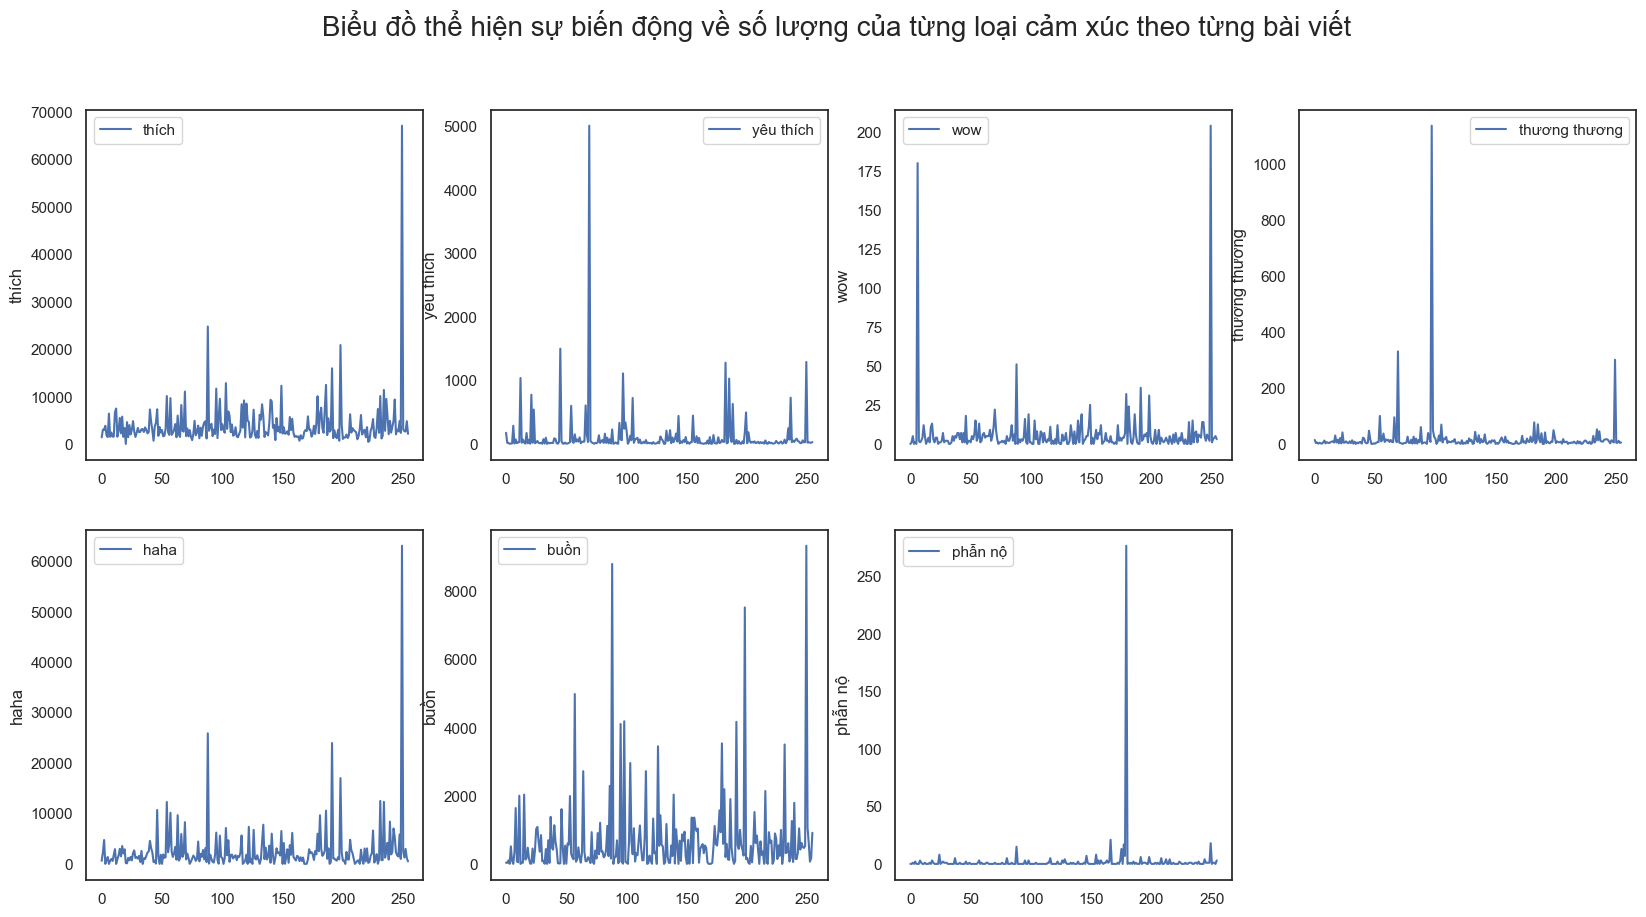

In [627]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.lineplot(data_reac['thích'], ax=axs[0, 0], label='thích')
sns.lineplot(data_reac['yêu thích'], ax=axs[0, 1], label='yêu thích')
sns.lineplot(data_reac['wow'], ax=axs[0, 2], label='wow')
sns.lineplot(data_reac['thương thương'], ax=axs[0, 3], label='thương thương')
sns.lineplot(data_reac['haha'], ax=axs[1, 0], label='haha')
sns.lineplot(data_reac['buồn'], ax=axs[1, 1], label='buồn')
sns.lineplot(data_reac['phẫn nộ'], ax=axs[1, 2], label='phẫn nộ')
axs[1, 3].remove()

plt.suptitle('Biểu đồ thể hiện sự biến động về số lượng của từng loại cảm xúc theo từng bài viết', fontsize=20)

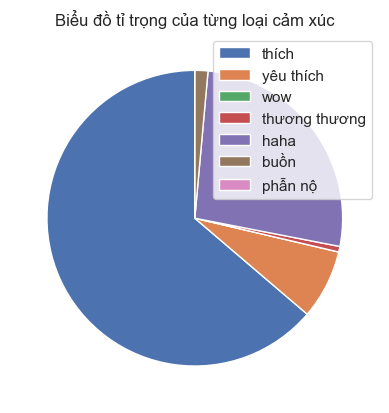

In [628]:
# Biểu đồ tỉ trọng của từng loại cảm xúc
counter = [
    data_reac['thích'].iloc[:1].mean(),
    data_reac['yêu thích'].iloc[:1].mean(),
    data_reac['wow'].iloc[:1].mean(),
    data_reac['thương thương'].iloc[:1].mean(),
    data_reac['haha'].iloc[:1].mean(),
    data_reac['buồn'].iloc[:1].mean(),
    data_reac['phẫn nộ'].iloc[:1].mean()
]
df_counter = pd.DataFrame(counter, columns=['Tỉ trọng trung bình của từng loại cảm xúc'], index=['thích', 'yêu thích', 'wow', 'thương thương', 'haha', 'buồn', 'phẫn nộ'])

# Vẽ biểu đồ pie
fig, ax = plt.subplots()
ax.pie(df_counter['Tỉ trọng trung bình của từng loại cảm xúc'], labels=['','','','','','',''], startangle=90)
ax.set_title('Biểu đồ tỉ trọng của từng loại cảm xúc')

# Hiển thị biểu đồ
plt.legend(loc='upper right', labels=['thích', 'yêu thích', 'wow', 'thương thương', 'haha', 'buồn', 'phẫn nộ'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13004\3835010896.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='post_length', y='reaction_count', data=data_df, alpha=0.7, palette='viridis')


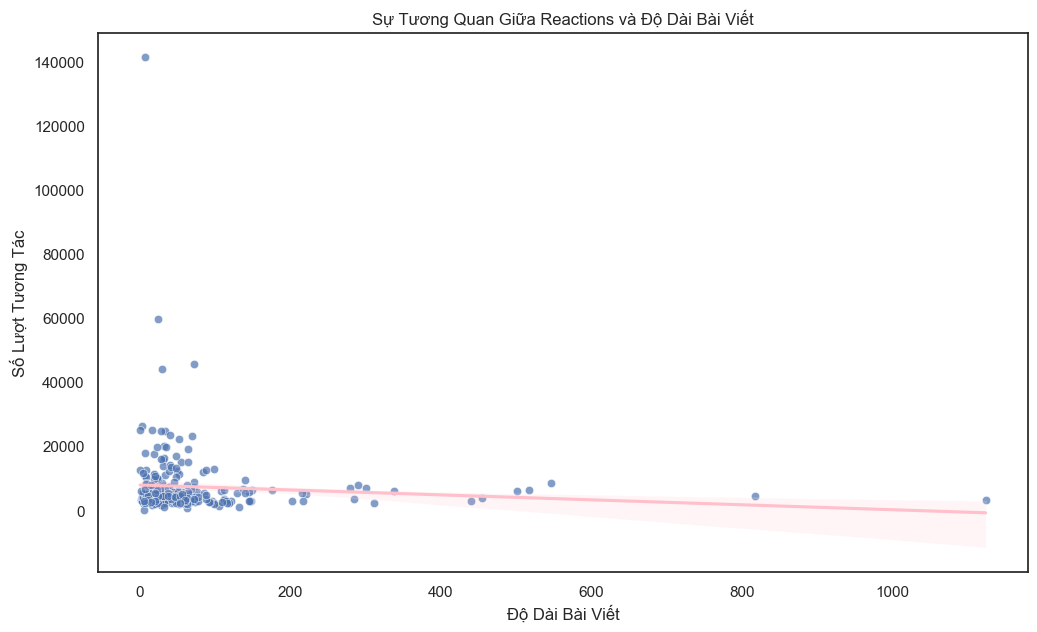

In [629]:
data_df['post_length'] = data_df['post_text'].apply(len)

plt.figure(figsize=(12, 7))
sns.scatterplot(x='post_length', y='reaction_count', data=data_df, alpha=0.7, palette='viridis')

sns.regplot(x='post_length', y='reaction_count', data=data_df, scatter=False, color='pink')

plt.title('Sự Tương Quan Giữa Reactions và Độ Dài Bài Viết')
plt.xlabel('Độ Dài Bài Viết')
plt.ylabel('Số Lượt Tương Tác')
plt.show()


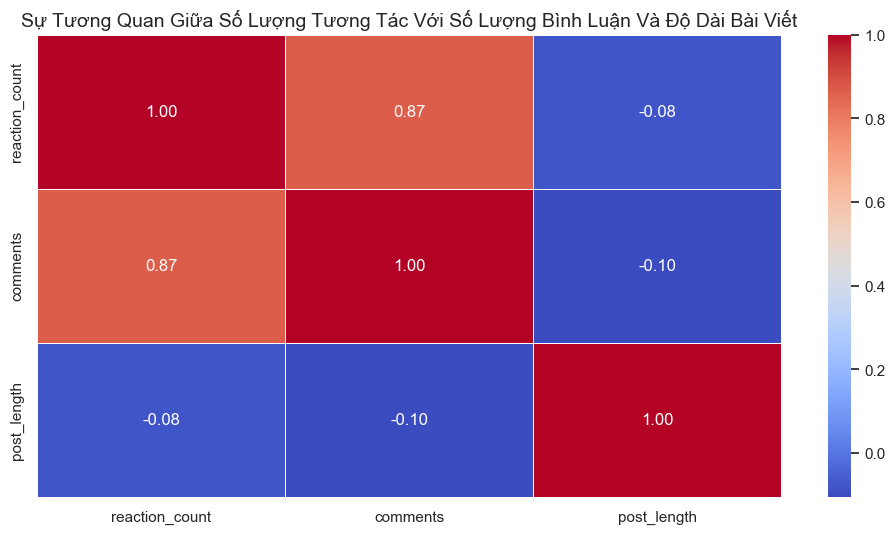

In [630]:
numerical_columns = ['reaction_count', 'comments', 'post_length']
correlation_matrix = data_df[numerical_columns].corr()

plt.figure(figsize=(12, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sự Tương Quan Giữa Số Lượng Tương Tác Với Số Lượng Bình Luận Và Độ Dài Bài Viết', fontsize=14)
plt.show()


## Phân tích bài viết của page

### Phân tích bài viết của page

In [631]:
df_text = data_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
254  293954556657419            Thế là hết luôn ngày Chủ Nhật rồi đấy 🤗
253  293975573321984                            Z đi cho nó nhanh 💁🏻‍♀️
252  294354743284067                                 Juan hoi nay rui 👍
251  294449773274564                                         Lười đăng.
250  294537569932451                     Xuống nhặt rau cho mẹ đi này 😀
..               ...                                                ...
4    371373332248874  Kiếp nạn:\nĐêm mất ngủ, ngày ngủ bù thì hàng x...
3    370353522350855  Đừng cúi đầu vương miện sẽ rơi 👑\n\nVào ngay M...
2    371894908863383                                   Tôi của sau này:
1    372036668849207  Spotify 2023 Wrapped chắc sẽ tức điêng khi lọc...
0    372350952151112  Hạnh phúc là khi:\n11 rưỡi trưa chủ nhật vẫn đ...

[255 rows x 2 columns]

Tìm các bài viết chứa 1 từ khóa nào đó

In [632]:
post = data_reac['post_text'].tolist()
print("Có tất cả",len(post),"bài viết")
res=[]
for i in post :
  if "lười" in i: res.append(i)
print("Có",len(res),"bài viết chứa từ khóa trên")
res   

Có tất cả 255 bài viết
Có 20 bài viết chứa từ khóa trên


['TOP 1 người lười tìm idea thả thính crush:\n❌ Brainstorm, tra mạng, hỏi chat GPT\n✅ Lặng lẽ lưu lại comment thả thính của Starbucks để ngày 11.11 xài dần 😉\n\n#StarbucksVietnam #StarbucksVN #Gửi_Chút_Ngọt_Ngào #DolceMisto',
 '“Chủ tịch hội người lười Việt Nam” - nữ ca sĩ Bích Phương a.k.a “game thủ” Tung Hoang đã ngưng nằm mà ngồi dậy… lựa tivi 🙄😱\n\nTCL tạo ra minigame này cho người lười hở? Sao đơn giản dị không cần ra khỏi nhà cũng lựa được tivi màn hình lớn nữa 🤣\n\nThử thách “Inch nào như In” nôm na là “ướm” tivi TCL vào không gian nhà bạn, xem cái nào phù hợp thì chốt đơn luôn khỏi suy nghĩ, có 4 size 65”, 75”, 85” & 98” - toàn tivi màn hình lớn xu hướng hiện nay!\n\nĐặc biệt, “ướm” xong nhớ chụp lại để tham gia Minigame theo 3 bước, nhiều khi nhận luôn “hàng thiệt” TV TCL 65inch nha\n\n1️⃣ Truy cập AR Filter\n-> chọn kích thước tivi mong muốn\n\n2️⃣ Chụp ảnh hoàn chỉnh sau khi đã đặt tivi xong và đăng thành phẩm tại đây: https://www.facebook.com/TCLVietnam/posts/pfbid0RBHk72aj

In [633]:
data_reac['post_text']
text = "" 
for i in data_reac['post_text']:
  text=text+i+"\n"

In [634]:
# Số từ xuất hiện trong văn bản
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

# Số câu xuất hiện trong văn bản
total_sentences = sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)

3962
73


Tính TF-IDF để dò ra một số keyword

In [635]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.', '')
    if each_word in words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Lấy từng từ chia cho tổng số từ
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

df = pd.DataFrame(tf_score.items(), columns=['Word', 'TF Score'])
print("TF Scores:")
df

TF Scores:


Word  TF Score
0     phúc  0.000252
1     rưỡi  0.000252
2     trưa  0.002524
3     nhật  0.000757
4      ngủ  0.011358
..     ...       ...
453   nhặt  0.000252
454    rau  0.000252
455    hoi  0.000252
456    rui  0.000252
457  💁🏻‍♀️  0.000252

[458 rows x 2 columns]

In [636]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

# Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.', '')
    if each_word in words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
idf_df = pd.DataFrame(list(idf_score.items()), columns=['Word', 'IDF Score'])

print("IDF Scores:")
idf_df

IDF Scores:


Word  IDF Score
0     phúc   4.290459
1     rưỡi   4.290459
2     trưa   0.506270
3     nhật   0.856472
4      ngủ   0.626898
..     ...        ...
453   nhặt   4.290459
454    rau   4.290459
455    hoi   4.290459
456    rui   4.290459
457  💁🏻‍♀️   4.290459

[458 rows x 2 columns]

In [637]:
# Tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 

tf_idf_df = pd.DataFrame(list(tf_idf_score.items()), columns=['Word', 'TF-IDF Score'])
print("\nTF-IDF Scores:")
tf_idf_df


TF-IDF Scores:


Word  TF-IDF Score
0     phúc      0.001083
1     rưỡi      0.001083
2     trưa      0.001278
3     nhật      0.000649
4      ngủ      0.007120
..     ...           ...
453   nhặt      0.001083
454    rau      0.001083
455    hoi      0.001083
456    rui      0.001083
457  💁🏻‍♀️      0.001083

[458 rows x 2 columns]

In [638]:
# Lấy 10 từ quan trọng nhất
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{'ngủ': 0.007120242497688922,
 'xong': 0.005031547717011481,
 'buồn': 0.004843682939081577,
 'nằm': 0.004754950473071566,
 'lười': 0.003494522207637052,
 'dậy': 0.003387359348977743,
 '👉🏻👈🏻': 0.0029320192630272594,
 'quý': 0.0021990144472704446,
 '7749': 0.0021990144472704446,
 'huỷ': 0.00216580486680888}

### Các từ khóa có tần suất xuất hiện nhiều của `post_text`

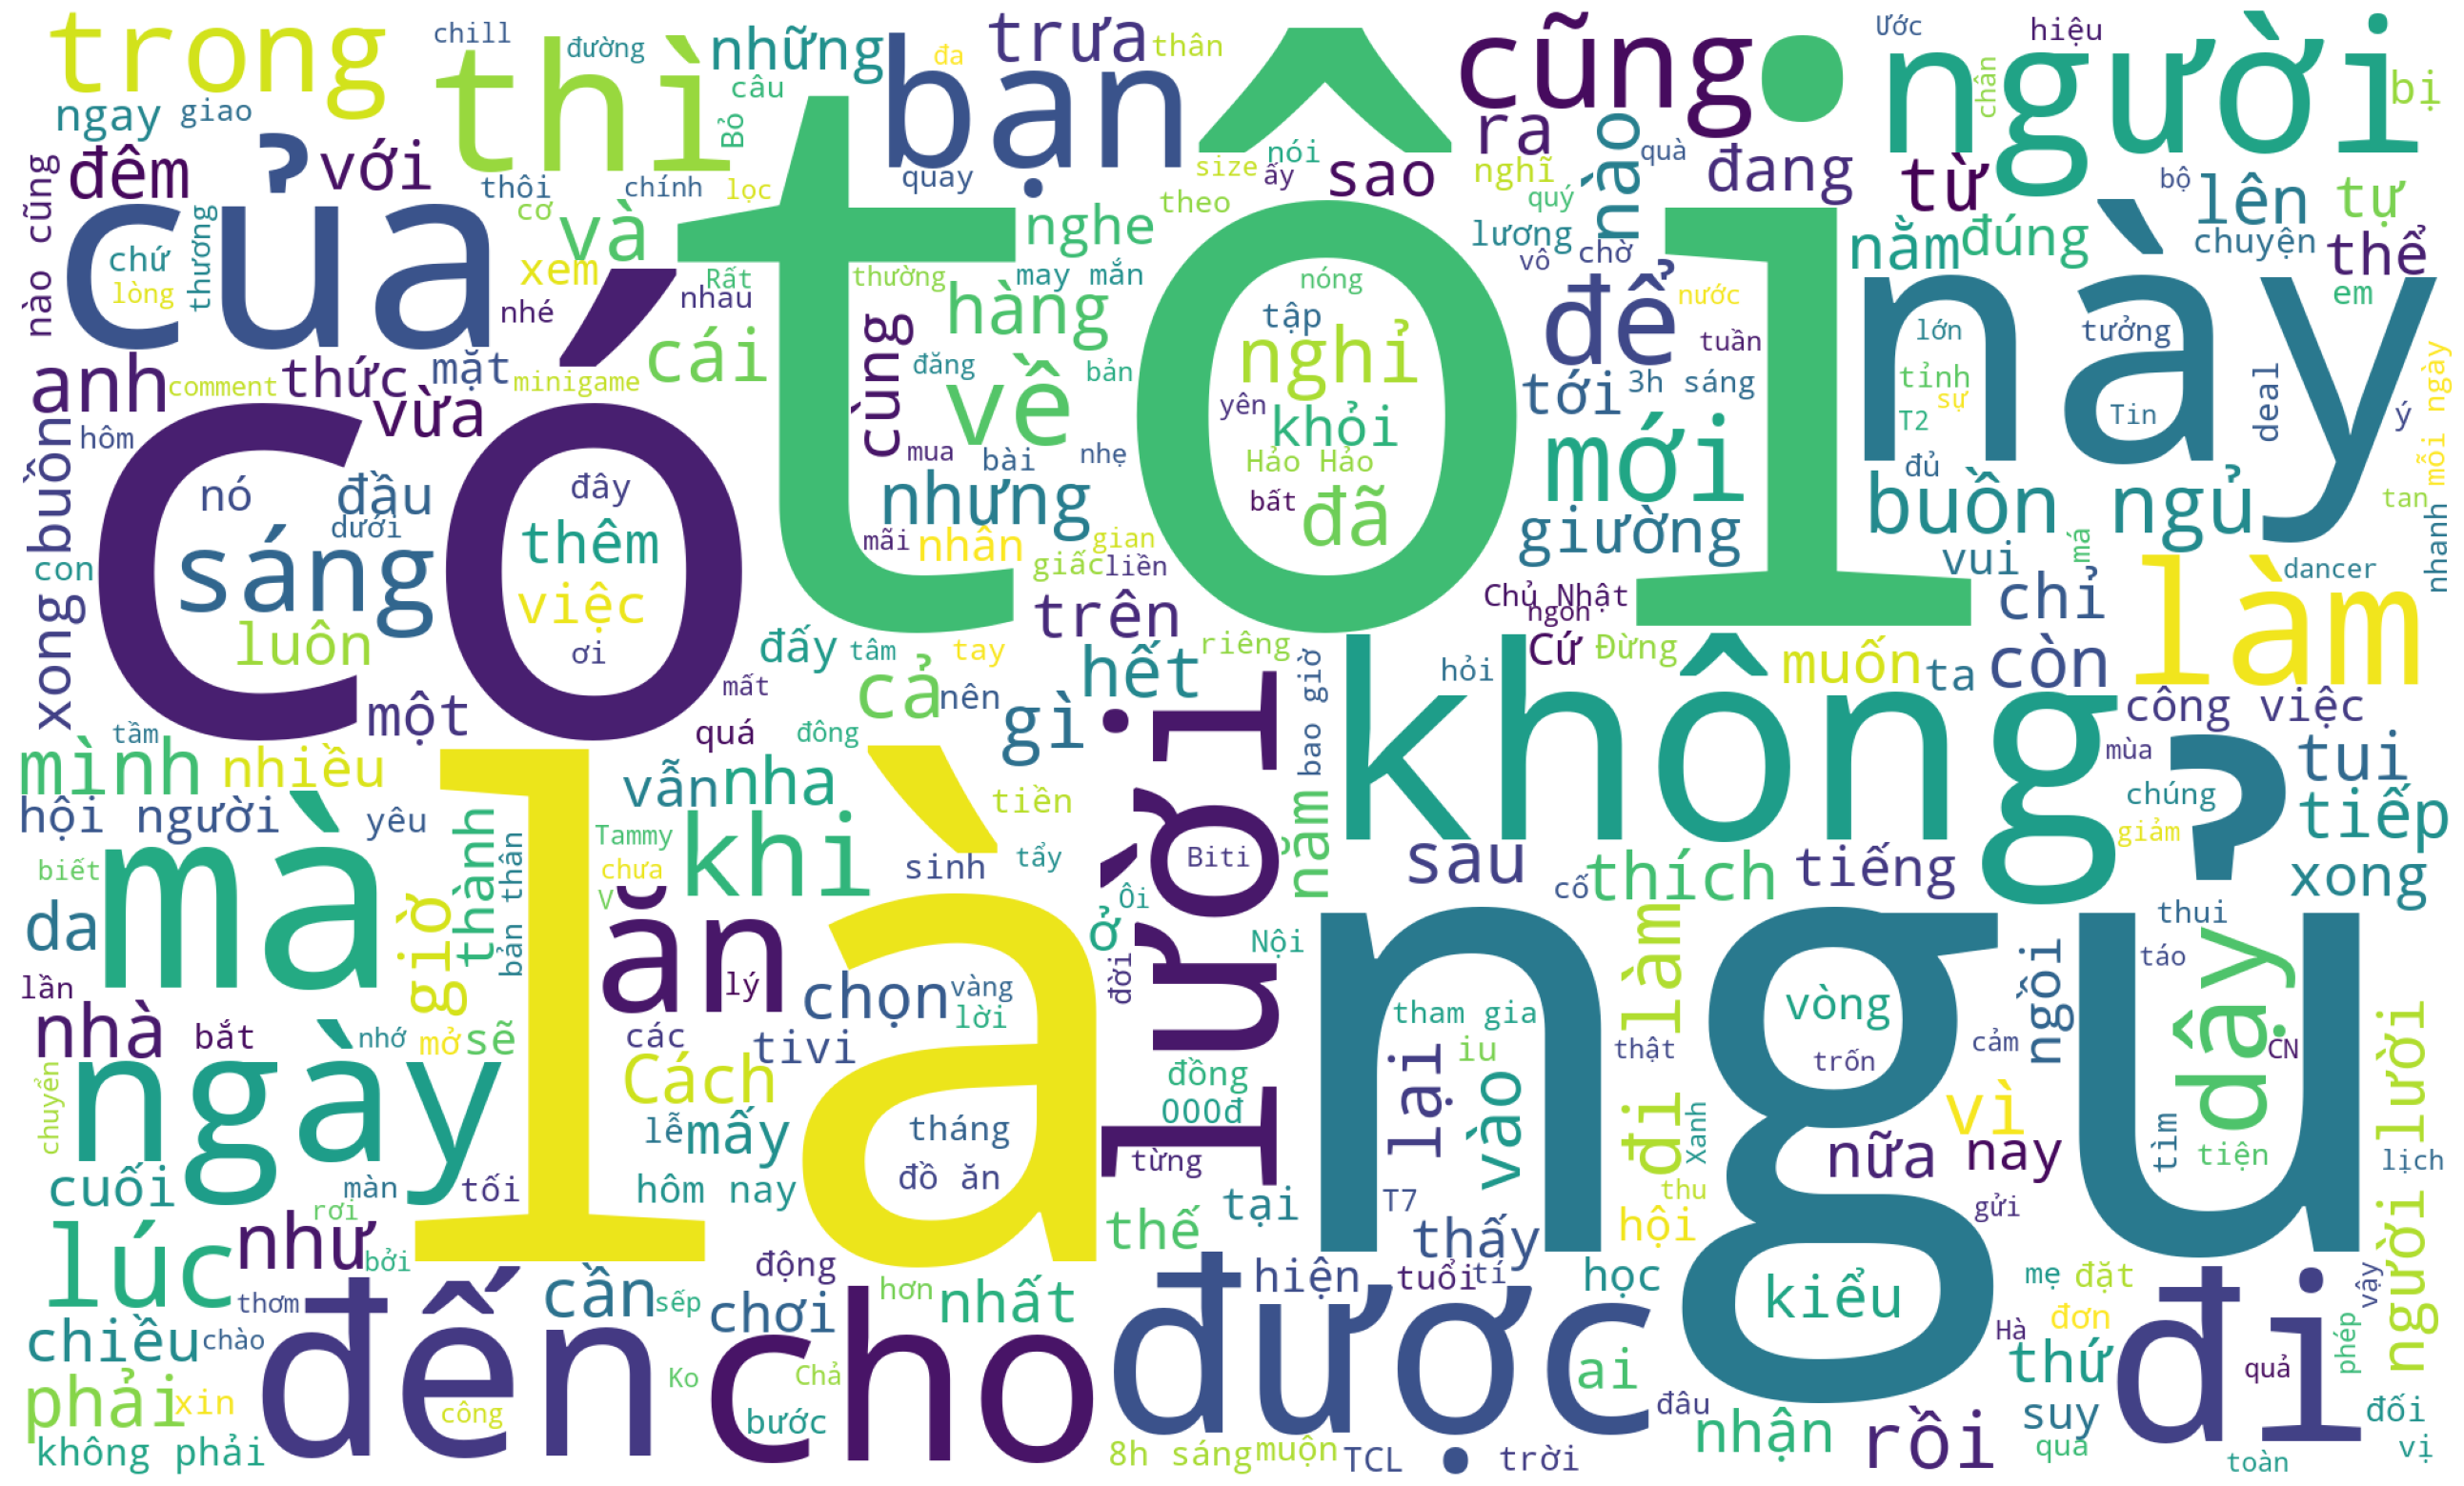

In [639]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Phân tích comment của người dùng

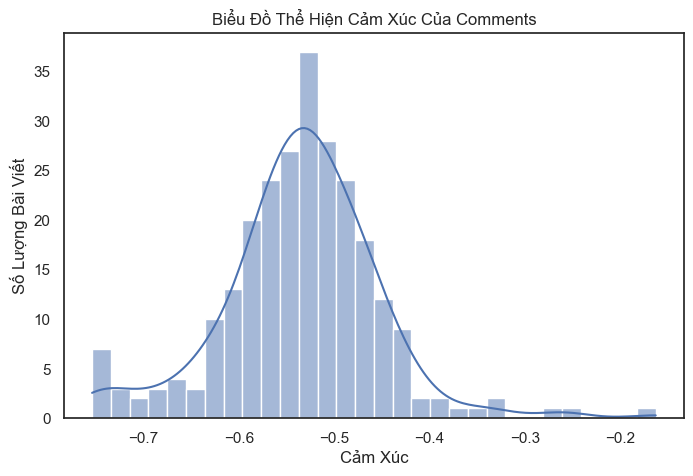

In [640]:
comments = data_df['comments_full']

sentiments = comments.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

data_df['comment_sentiment'] = sentiments

plt.figure(figsize=(8, 5))
sns.histplot(data_df['comment_sentiment'], bins=30, kde=True)
plt.title('Biểu Đồ Thể Hiện Cảm Xúc Của Comments')
plt.xlabel('Cảm Xúc')
plt.ylabel('Số Lượng Bài Viết')
plt.show()


Ta có thể thấy các comments mang xu hướng không tốt do biểu đồ chiếm giá trị chủ yếu trong khoảng từ -0.6 đến -0.5.

In [641]:
post = data_reac['comments_full'].tolist()
res=[]
for i in post :
  if "lười" in i: res.append(i)
print("Có",len(res),"comment chứa từ khóa trên trong", len(post), "bài viết")
res

Có 70 comment chứa từ khóa trên trong 255 bài viết


['[{\'comment_id\': \'1044127293489046\', \'comment_url\': \'https://facebook.com/1044127293489046\', \'commenter_id\': \'100081286307548\', \'commenter_url\': \'https://facebook.com/luoi.vn?eav=AfbBq10dpFLyB3PMHsn7rydhQHjnBVzoCSMWt1JjKBwirrd8Cs8cFJRPoZjKMwvVxjc&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Hội người lười Việt Nam\', \'commenter_meta\': \'Tác giả\', \'comment_text\': \'Con người đơn giản=)))))))\', \'comment_time\': datetime.datetime(2023, 11, 17, 0, 0), \'comment_image\': None, \'comment_reactors\': [], \'comment_reactions\': None, \'comment_reaction_count\': None, \'replies\': [{\'comment_id\': \'1041415937128369\', \'comment_url\': \'https://facebook.com/1041415937128369\', \'commenter_id\': \'61552972882224\', \'commenter_url\': \'https://facebook.com/profile.php?id=61552972882224&eav=AfYu0t4xnVopefvAsPAA_tTQmbCkv5DdwZq3GlVDimteowPycyD6P1NANXj2tegcXdw&fref=nf&rc=p&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Ngày Càng Đông \', \'commenter_meta\

In [642]:
data_reac['comments_full']
cmt_text = "" 
for i in data_reac['comments_full']:
  cmt_text = cmt_text + i + "\n"

In [643]:
# Số từ xuất hiện trong bình luận
total_words = cmt_text.split()
total_word_length = len(total_words)
print(total_word_length)

# Số câu xuất hiện trong bình luận
total_sentences = sent_tokenize(cmt_text)
total_sent_len = len(total_sentences)
print(total_sent_len)

335922
306


In [644]:
word = {}
for each_word in total_words:
    each_word = each_word.replace('.', '')
    if each_word in words:
        if each_word in word:
            word[each_word] += 1
        else:
            word[each_word] = 1
            
word_df = pd.DataFrame(list(word.items()), columns=['Word', 'Count'])
word_df.sort_values('Count', ascending=False, inplace=True)
word_df

Word  Count
14    lười    118
2      dậy     96
30     học     84
23     tui     79
105    mua     57
..     ...    ...
266  thuận      1
265    lợi      1
263    tẩy      1
249    4tr      1
396    hào      1

[397 rows x 2 columns]

## Phân tích commenter

In [645]:
# Tìm Top commenter và số lượng cmt
commenter_counts = data_df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts()
top_commenter = commenter_counts.idxmax()
top_comment_count = commenter_counts.max()

# Danh sách top commenter và số lượng cmt
top_commenters = commenter_counts.index.tolist()
top_comment_counts = commenter_counts.tolist()

print("Danh sách top commenter:")
for commenter, comment_count in zip(top_commenters, top_comment_counts):
    print(f"{commenter}: {comment_count} bình luận")
print(f"Top commenter: {top_commenter}, Số lượng bình luận: {top_comment_count}")

Danh sách top commenter:
Hội người lười Việt Nam: 43 bình luận
Ăn Lấy Sức Giảm Cân Ạ: 2 bình luận
Nguyễn Phương Thảo: 2 bình luận
Nguyen Ngoc Anh: 2 bình luận
Bảo Trâm: 2 bình luận
Rya Robert Scott: 2 bình luận
Nguyễn Thị Huyền Trâm: 2 bình luận
Quỳnh Chi: 2 bình luận
Tố Quyên: 1 bình luận
Đức Nguyễn: 1 bình luận
Wis stores: 1 bình luận
Thùy Dương: 1 bình luận
Lê Xuân Tú: 1 bình luận
Nguyễn Linh Hương: 1 bình luận
Phương Linh: 1 bình luận
Vương Ngọc Bảo Vy: 1 bình luận
Hạ Nhi: 1 bình luận
Quân: 1 bình luận
Hoàng Thị Thu Hiền: 1 bình luận
Ha Linh Nhi: 1 bình luận
Ngọc Trâm: 1 bình luận
Đoàn Thanh Hoa: 1 bình luận
Diễm Quỳnh: 1 bình luận
Thu Điếu: 1 bình luận
Nhím Nqu: 1 bình luận
Trần Hải Đăng: 1 bình luận
Pkan Trang: 1 bình luận
Thùy Vỹ: 1 bình luận
Khương Linh Thảo: 1 bình luận
Ngọc Ly: 1 bình luận
Đoàn Hương Lan: 1 bình luận
Nguyễn Thư: 1 bình luận
Nguyegg Phanh: 1 bình luận
Giệo Leeng: 1 bình luận
Huynh Pthanh: 1 bình luận
Nguyễn Phạm Thủy Tiên: 1 bình luận
Ly Hai Yen: 1 bình luận
Q

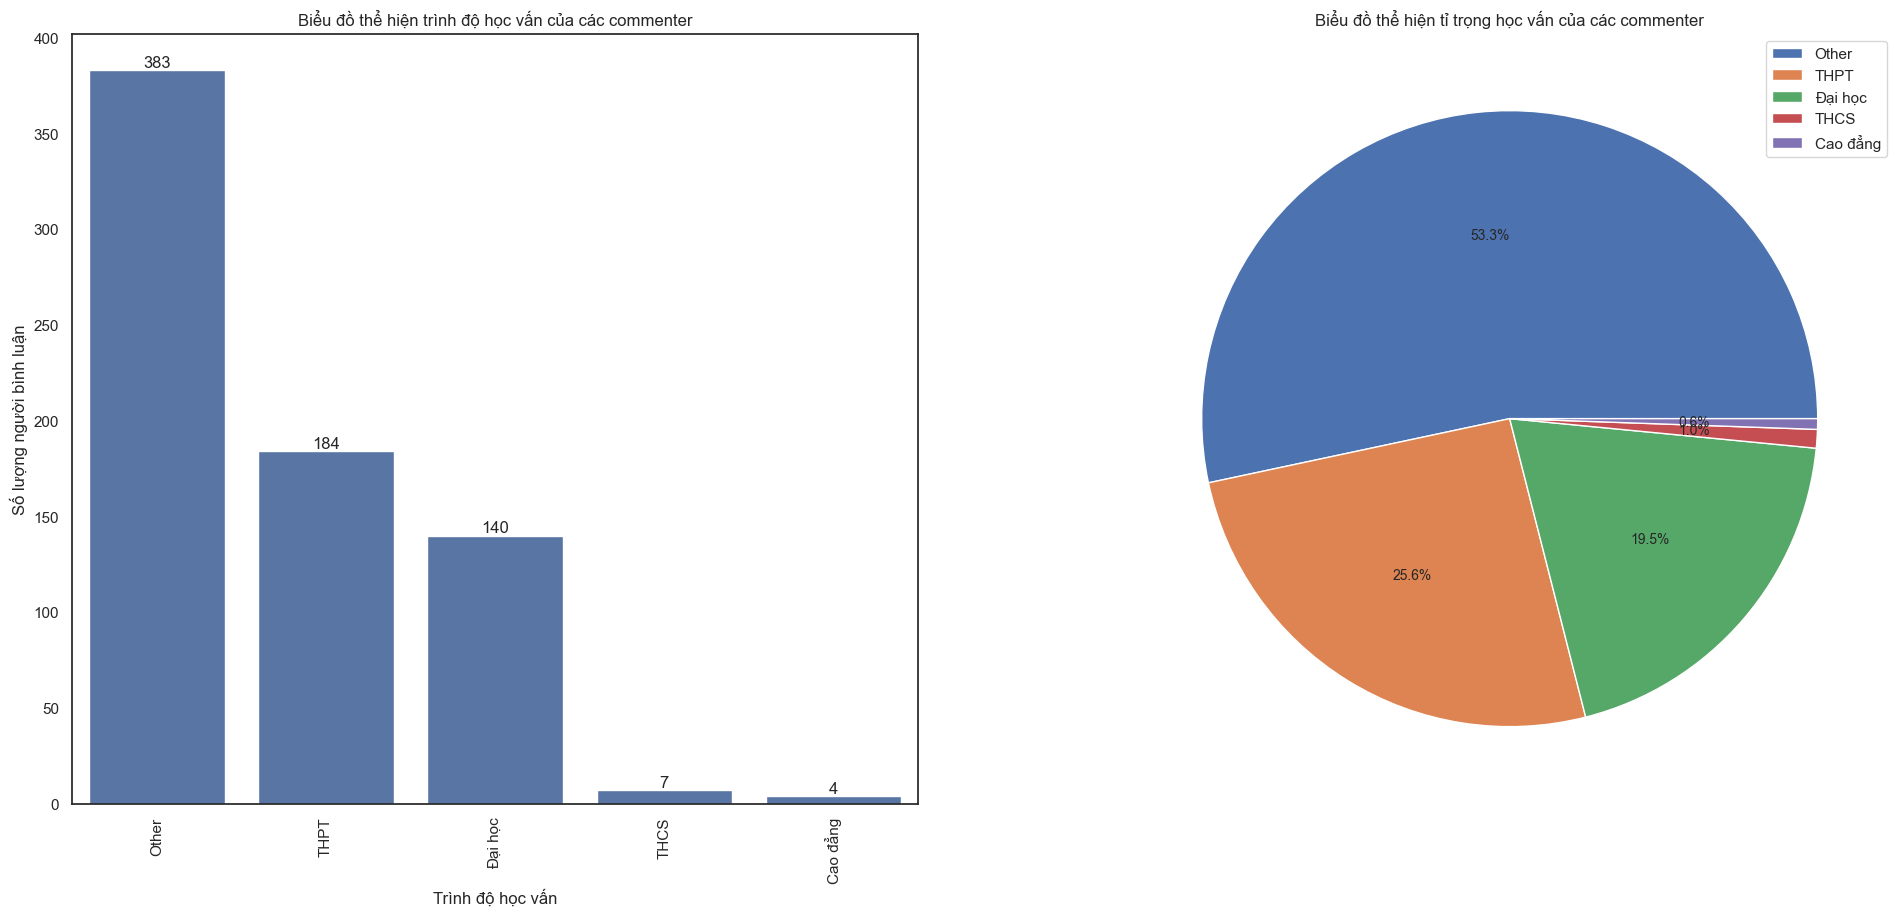

In [646]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))
ax = sns.barplot(info_df['Trình độ học vấn'].value_counts(), ax=axs[0])
plt.sca(ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện trình độ học vấn của các commenter')
plt.xlabel('Trình độ học vấn')
plt.ylabel('Số lượng người bình luận')

for i in ax.containers:
    ax.bar_label(i,)

plt.sca(axs[1])
ax1 = info_df['Trình độ học vấn'].value_counts().plot(kind='pie', title='Biểu đồ thể hiện tỉ trọng học vấn của các commenter',  labels=['','','','','','',''], textprops={'fontsize': 10}, autopct='%1.1f%%', ax=axs[1])
plt.ylabel('')
plt.legend(loc='upper right', labels=['Other', 'THPT', 'Đại học', 'THCS', 'Cao đẳng'])

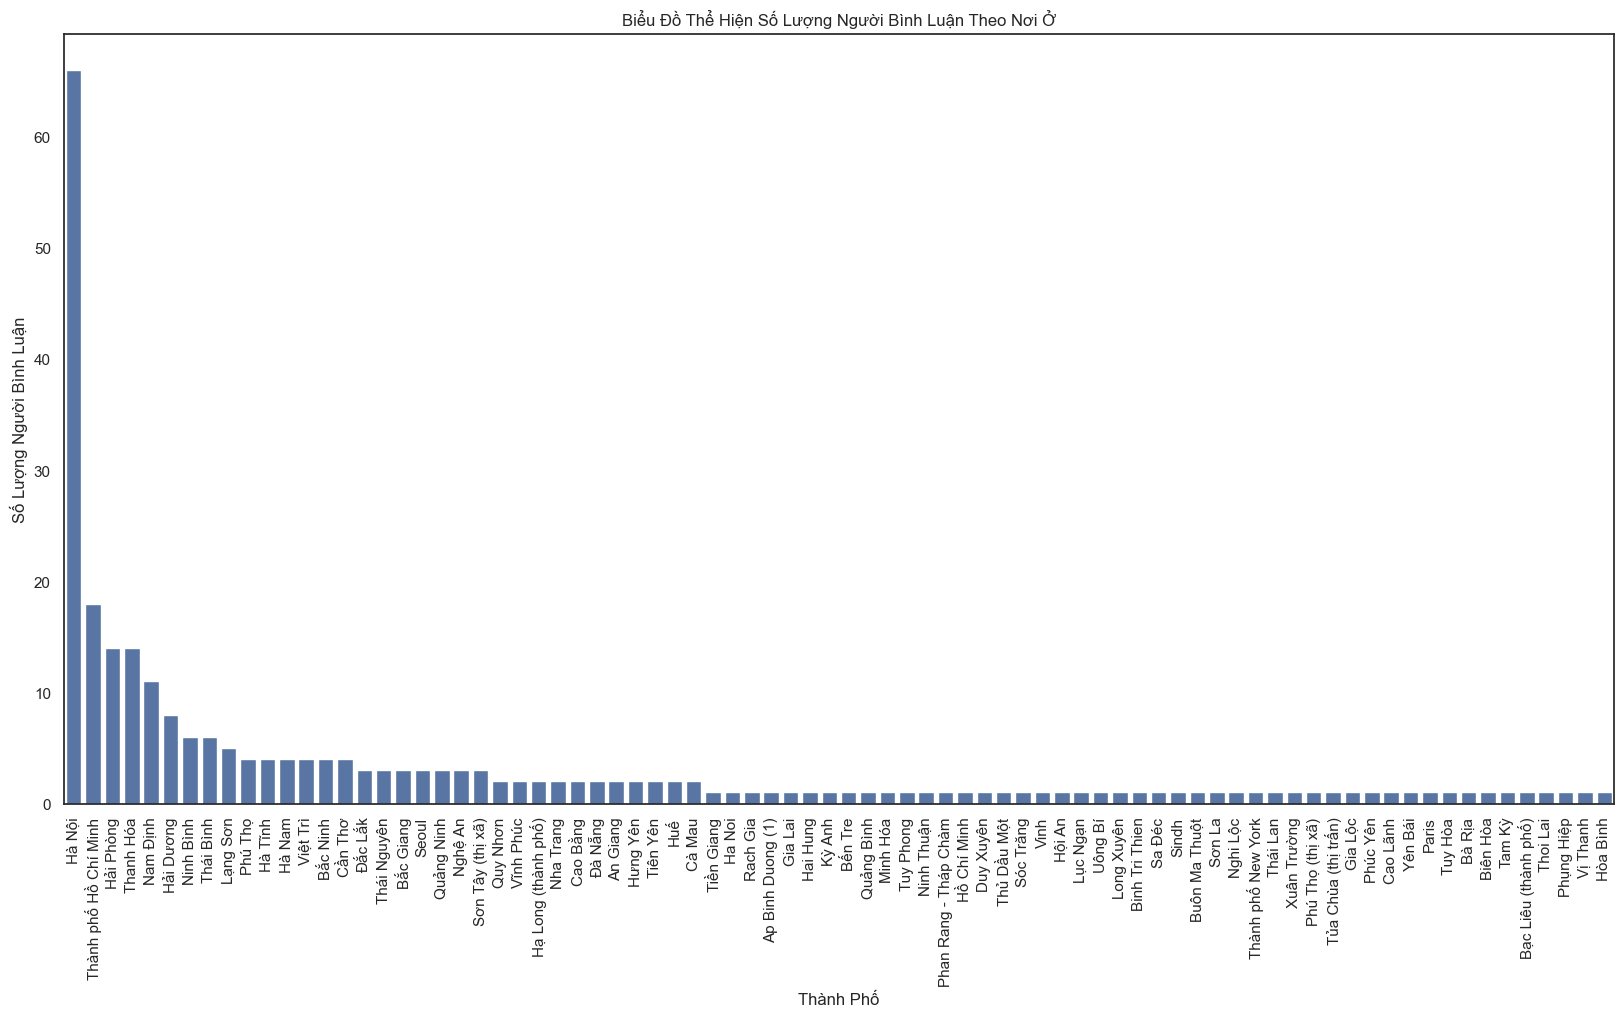

In [647]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(info_df['Nơi ở hiện tại'].value_counts())
plt.xticks(rotation=90)
plt.title('Biểu Đồ Thể Hiện Số Lượng Người Bình Luận Theo Nơi Ở')
plt.xlabel('Thành Phố')
plt.ylabel('Số Lượng Người Bình Luận')
plt.show()

# Áp dụng mô hình học máy Linear Regression để dự đoán tương tác trong tương lai

In [648]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Chọn data
X = data_df[['comments', 'shares']]
y = data_df['reaction_count']

# Chia data thành tập huấn và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dùng Linear Regression model
model = LinearRegression()

# Train cho mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
predictions = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 28880708.201827727


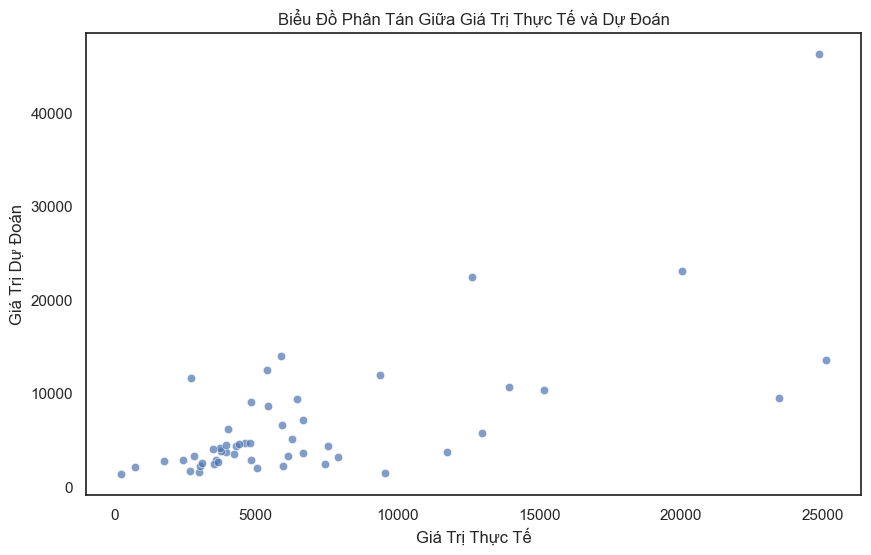

In [649]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
plt.title('Biểu Đồ Phân Tán Giữa Giá Trị Thực Tế và Dự Đoán')
plt.xlabel('Giá Trị Thực Tế')
plt.ylabel('Giá Trị Dự Đoán')
plt.show()

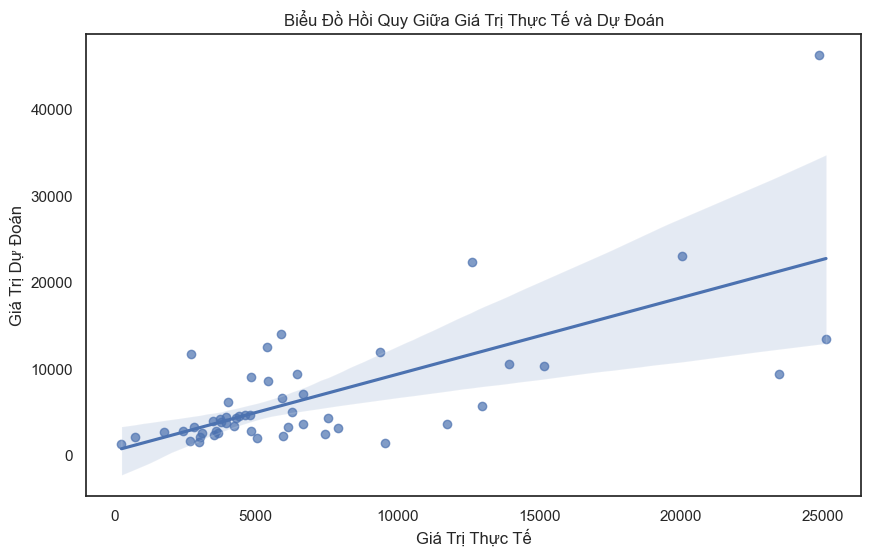

In [650]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.7})
plt.title('Biểu Đồ Hồi Quy Giữa Giá Trị Thực Tế và Dự Đoán')
plt.xlabel('Giá Trị Thực Tế')
plt.ylabel('Giá Trị Dự Đoán')
plt.show()

# Hỏi và trả lời các câu hỏi đề xuất

### Top 5 bài viết có lượt tương tác cao nhất?

In [651]:
top_reac =data_df.sort_values('reaction_count', ascending=False)
top_reac[['post_id','text','time','links','reaction_count','comments','shares']].head(5)

post_id                                               text  \
249  294905503228991                                           Hết cãi.   
88   346350928084448                          Cố nốt chap nữa thui mò 🥹   
198  320788793973995  Khi bạn đói quắt cả người vào nhưng bạn cũng n...   
191  322398247146383                     Nhưng mà khoái =))))))))))))))   
231  307036005349274                                                Um.   

                   time                                              links  \
249 2023-07-11 10:29:22  [{'link': '/story.php?story_fbid=pfbid02CbzdaW...   
88  2023-10-10 22:10:52  [{'link': '/story.php?story_fbid=pfbid02gAq7qZ...   
198 2023-08-27 13:28:08  [{'link': '/story.php?story_fbid=pfbid02zTUjds...   
191 2023-08-30 09:00:03  [{'link': '/story.php?story_fbid=pfbid0hJo2XCG...   
231 2023-08-02 15:33:49  [{'link': '/story.php?story_fbid=pfbid09McDi8B...   

     reaction_count  comments  shares  
249          141377      9841    3802  
88            59876      3972    1902  
198           45720      6499    3493  
191           44300      2965     500  
231           26269      1044     599

### Top 5 bài viết có lượt tương tác thấp nhất?

In [652]:
top_reac =data_df.sort_values('reaction_count', ascending=True)
top_reac[['post_id','text','time','links','reaction_count','comments','shares']].head(5)

post_id                                               text  \
20   367008599352014  Hixxxx\n\nĐài Tiếng Nói GenZ\n16 tháng 11 lúc ...   
221  309846535068221  Sếp đai đí tranh thủ ăn vụng của sếp.\n3 từ th...   
43   360571646662376                   Mãi mới hẹn nhau tập được =)))))   
222  309820258404182  Chỉ sau 1 giấc ngủ trưa tại văn phòng\nTâm hồn...   
202  320385340681007  Lười không phải là cái tội, đặc biệt là được l...   

                   time                                              links  \
20  2023-11-16 11:05:00  [{'link': '/story.php?story_fbid=pfbid0fpdMVHn...   
221 2023-08-07 15:19:26  [{'link': '/story.php?story_fbid=pfbid035bJ4YY...   
43  2023-11-04 16:00:24  [{'link': '/story.php?story_fbid=pfbid0239YKhU...   
222 2023-08-07 14:08:50  [{'link': '/story.php?story_fbid=pfbid02PRJCQd...   
202 2023-08-26 20:00:32  [{'link': '/story.php?story_fbid=pfbid0WKZ2RPk...   

     reaction_count  comments  shares  
20              259        16       2  
221             732        88       7  
43             1152       176      14  
222            1181        69      29  
202            1509        76      40

### Có bao nhiêu bài viết nhiều hơn 10.000 lượt tương tác?

In [653]:
data_reac[data_reac['reaction_count'] >= 10000].shape[0]

45

### Top 5 người tương tác với page nhiều nhất?

In [654]:
top_commenters_info = list(zip(top_commenters[:5], top_comment_counts[:5]))

for commenter, comment_count in top_commenters_info:
    print(f"{commenter}: {comment_count} bình luận")

Hội người lười Việt Nam: 43 bình luận
Ăn Lấy Sức Giảm Cân Ạ: 2 bình luận
Nguyễn Phương Thảo: 2 bình luận
Nguyen Ngoc Anh: 2 bình luận
Bảo Trâm: 2 bình luận


### Thời điểm nào trong ngày có nhiều bài viết được đăng nhiều nhất?

In [655]:
hourly_post_count = data_df.groupby('hour').size().reset_index(name='post_count')
max_hour = hourly_post_count.loc[hourly_post_count['post_count'].idxmax(), 'hour']

print(f"Thời điểm trong ngày có nhiều bài viết được đăng nhiều nhất là: {max_hour}h")


Thời điểm trong ngày có nhiều bài viết được đăng nhiều nhất là: 10h


### Các từ khóa xuất hiện nhiều nhất trong `comments_full`

In [656]:
word_df.sort_values('Count', ascending=False, inplace=True)
top_word = word_df.head(10)
top_word

Word  Count
14    lười    118
2      dậy     96
30     học     84
23     tui     79
105    mua     57
97     mai     51
217   ngon     49
6      nằm     45
32     lun     42
42   tiếng     38

C:\Users\Admin\AppData\Local\Temp\ipykernel_13004\4231049273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=top_word, palette='viridis')


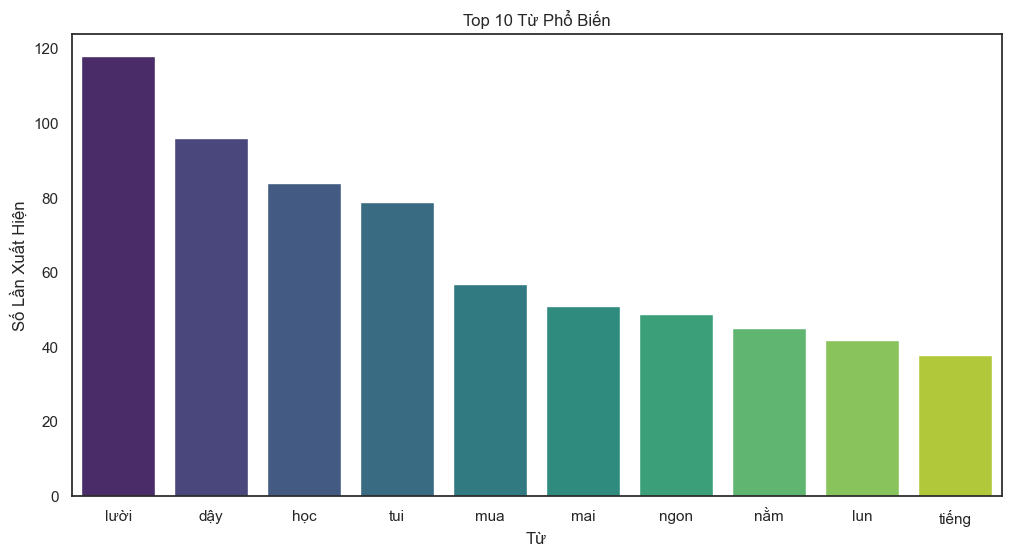

In [657]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=top_word, palette='viridis')
plt.title('Top 10 Từ Phổ Biến')
plt.xlabel('Từ')
plt.ylabel('Số Lần Xuất Hiện')
plt.show()


### Có bài viết nào có tỷ lệ chia sẻ cao mà không có nhiều thích hoặc bình luận không?

In [658]:
high_low = data_reac[(data_reac['shares'] > data_reac['likes']) & (data_reac['shares'] > data_reac['comments'])]

print("Các bài viết có tỷ lệ chia sẻ cao mà không có nhiều thích hoặc bình luận:")
print(high_low[['post_id', 'post_text', 'likes', 'comments', 'shares']])

Các bài viết có tỷ lệ chia sẻ cao mà không có nhiều thích hoặc bình luận:
Empty DataFrame
Columns: [post_id, post_text, likes, comments, shares]
Index: []
